In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
path="/content/drive/MyDrive/Colab Notebooks/modified_data.pkl"
df = pd.read_pickle(path, compression='infer')

In [3]:
df.shape

(43, 7)

In [4]:
#adding all the fed text in a list
all_fed_raw=list(df['TEXT'])

In [5]:
!pip install nltk
import nltk
from nltk.util import ngrams
nltk.download('stopwords')
nltk.download('punkt')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [6]:
#word count function
def count_word(text):
  words=text.split(" ")
  return len(words)

In [7]:
#remove all the stopword function
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.stem import PorterStemmer
stop_words = set(stopwords.words('english')) 
stop_words |= {"committee","policy","percent","economic"} 
def rem_stow(text):
  word_tokens = word_tokenize(text)
  filtered_sentence = []   
  for w in word_tokens: 
      if w not in stop_words: 
          filtered_sentence.append(w)
  return(" ".join(filtered_sentence))

In [8]:
#clean all the fed function
#function to perform all the cleaning
import re
def cleanText(text):
    text = re.sub("https?:\/\/.*[\r\n]*", "", text)
    text = re.sub("@\S+", "", text)
    text = re.sub("#", "", text)
    text = text.replace('\n',"")
    text = re.sub(r'[^a-zA-Z ]+',"",text)
    text = text.lower()
    text = text.strip()
    return text

In [9]:
all_fed_raw_word_count= [count_word(i) for i in all_fed_raw]
all_fed_clean_text= [rem_stow(cleanText(i)) for i in all_fed_raw]
all_fed_clean_word_count = [ count_word(rem_stow(cleanText(i))) for i in all_fed_raw]

In [10]:
df['words_raw']=all_fed_raw_word_count
df['clean_text']=all_fed_clean_text
df['words_clean']=all_fed_clean_word_count

In [11]:
#function to create a counter column of the most frequent words
from collections import Counter
def count_freq(text):
  from collections import Counter
  wor=text.split()
  Counter = Counter(wor)
  most_occur = Counter.most_common(30)
  return most_occur

In [12]:
df['freq_words']=[count_freq(i) for i in list(df['clean_text'])]

In [13]:
# #stri='\n \n \n December 19, 2018 Chairman Po'
# stri= df['TEXT'][2]
# sub='Chairman'
# index = stri.find(sub) 
# upda=stri[:index].strip()

In [14]:
# print(upda)
# print(index)

In [15]:
# sub='Chairman'
# date=[]
# for i in df['TEXT']:
#   index=i.find(sub)
#   upda=i[:index].strip()
#   date.append(upda)
# df['Date']=date
# #df.insert(0, date)  

In [16]:
datess= list(df['DATE'])

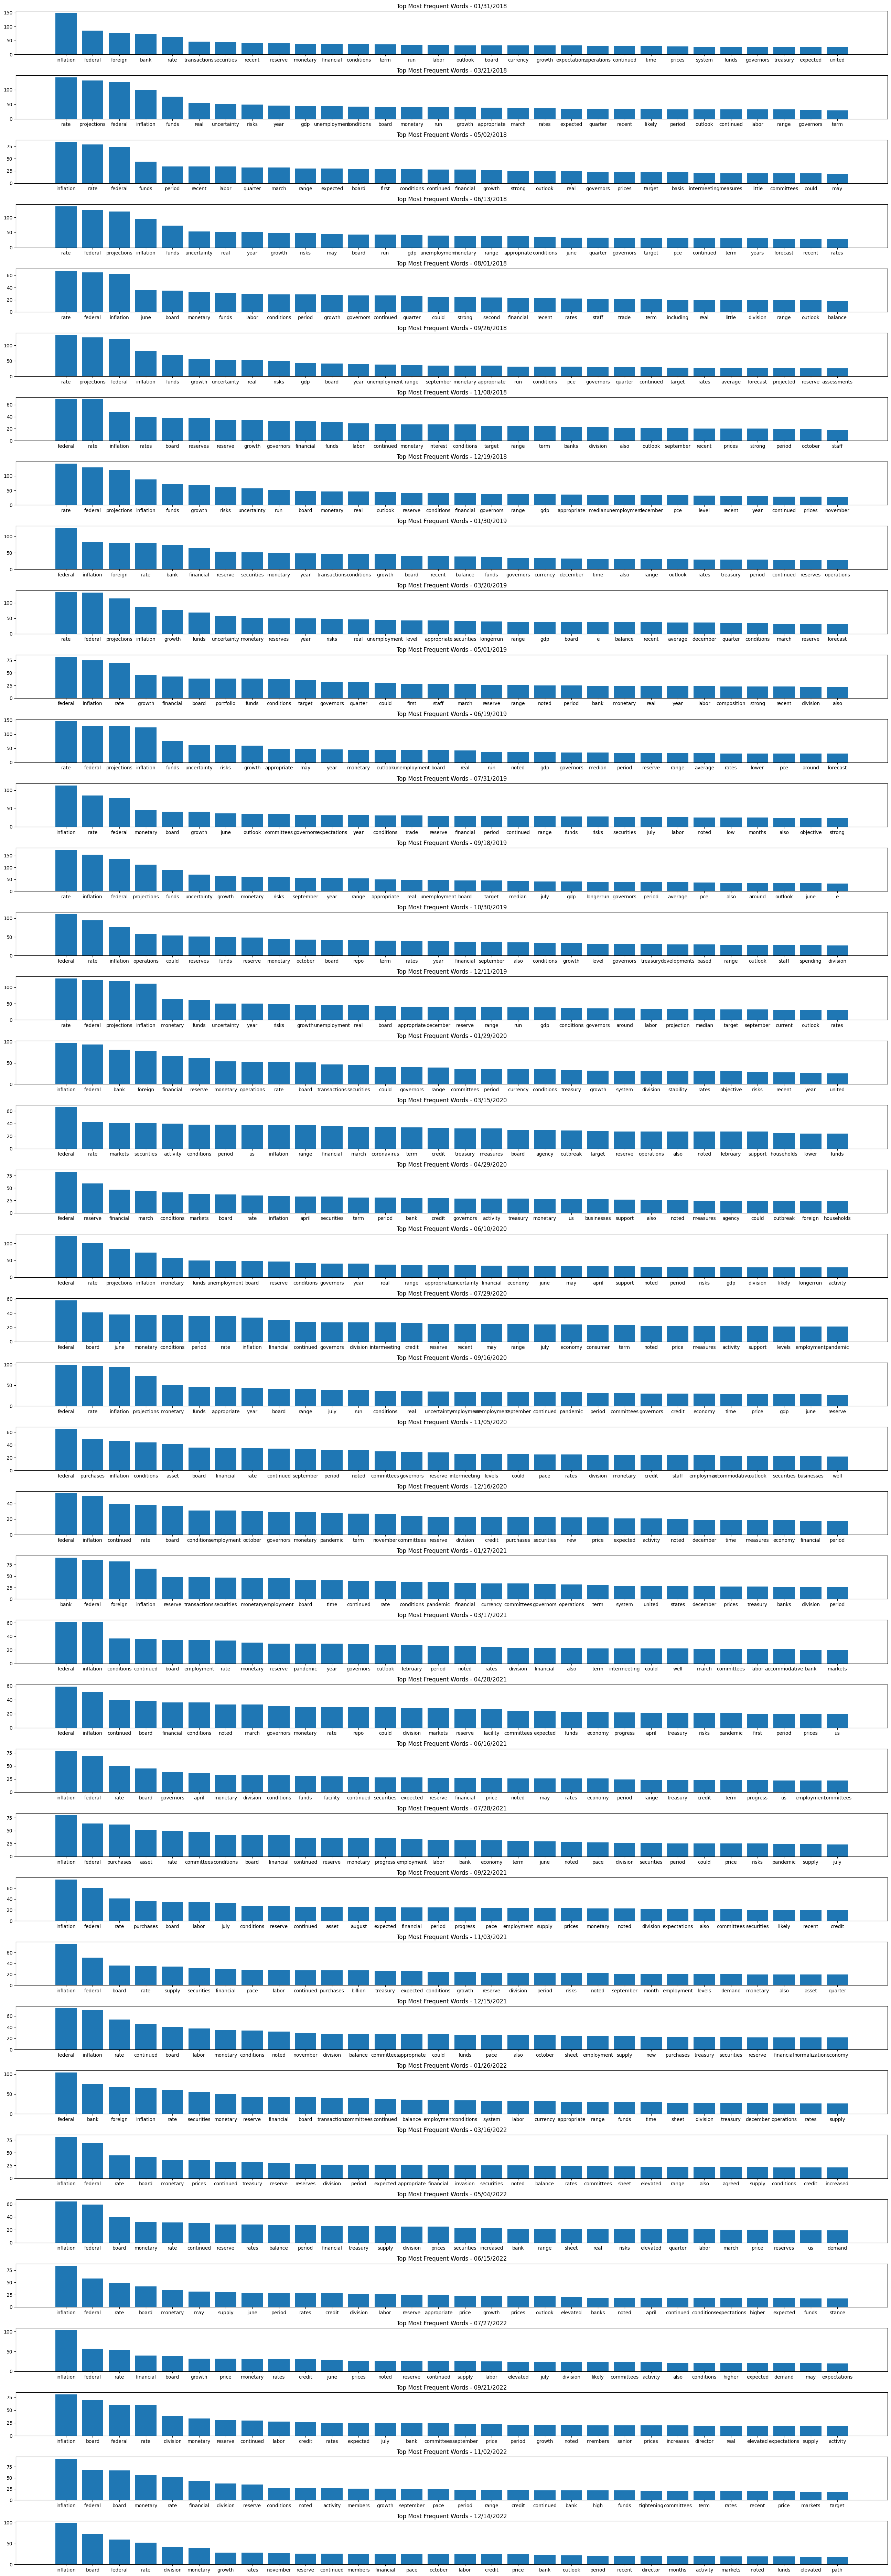

In [33]:

import nltk
from nltk import FreqDist
import matplotlib.pyplot as plt
all_content = []
exclude=[('remained'),('market'),('minutes'),'participants',('open'),('meeting'),('longer'),('would'),('selected'),('january')]
# Preprocess content and calculate word frequencies
contents = [df['clean_text'][i] for i in range(len(list(df['clean_text'])))]
# type(contents)

dates = datess
content_freqs = []
# Calculate word frequencies for each content
for content in contents :
  ppi = nltk.word_tokenize(content.lower())
  for ero in exclude:
        if ero in ppi:
          c = ppi.count(ero)
          for i in range(c):
            ppi.remove(ero)
  kalo = FreqDist(ppi)
  content_freqs.append(kalo)
# print(content_freqs)
# Get top 10 most frequent words for each content
top10_contents = [content_freq.most_common(30) for content_freq in content_freqs]

# Create a grid of bar charts
fig, axes = plt.subplots(nrows=40, ncols=1, figsize=(26, 75))

# Plot bar charts for each content
for i, (content, ax) in enumerate(zip(top10_contents, axes)):
    ax.bar([word[0] for word in content], [word[1] for word in content])
    #ax.set_title("Top Most Frequent Words")
    ax.set_title("Top Most Frequent Words - {}".format(dates[i]))

# Adjust layout and display the chart
plt.tight_layout()
plt.show()

In [18]:
all_clean=list(df['clean_text'])

<ipython-input-19-11ba29fda06d>:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(25, 1))


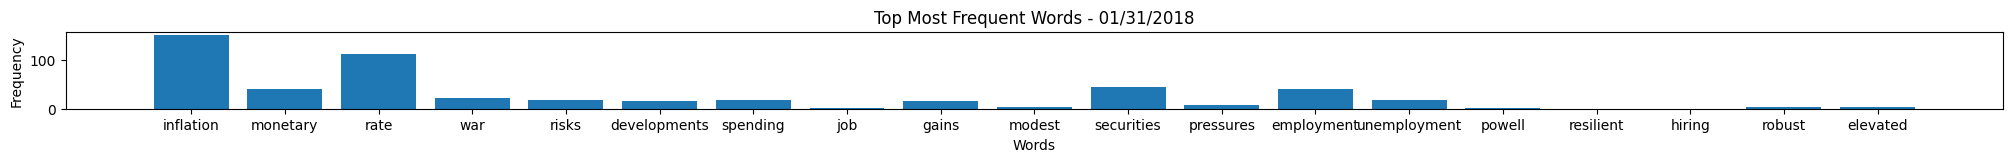

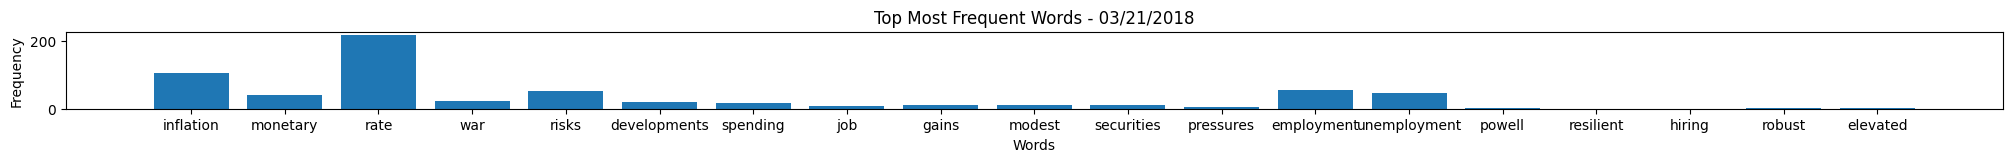

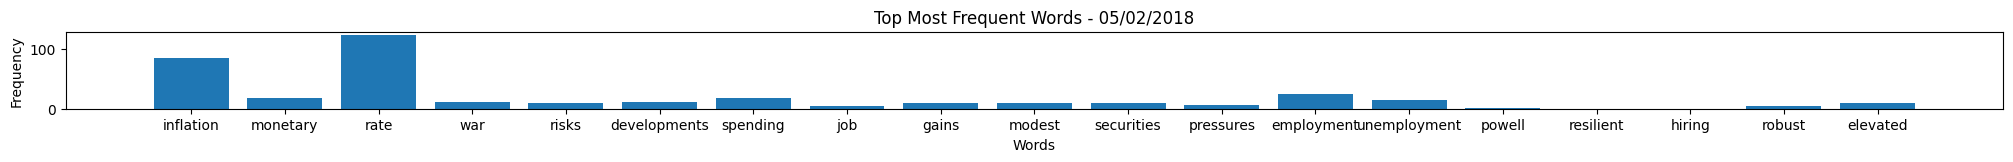

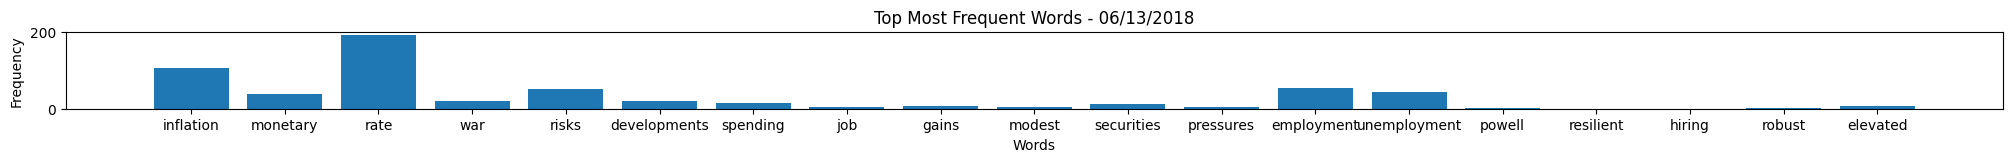

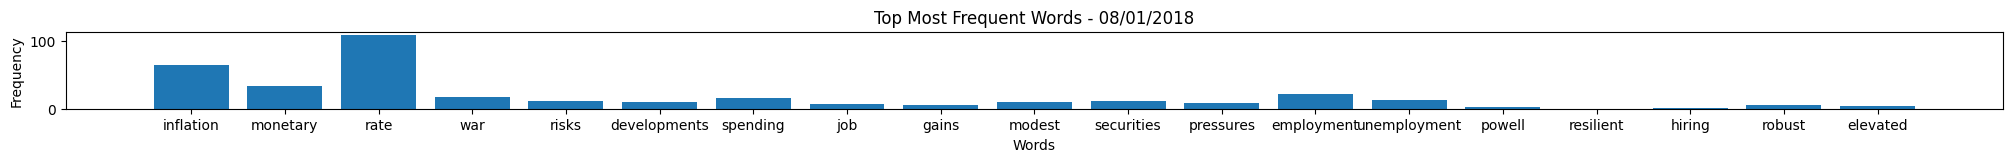

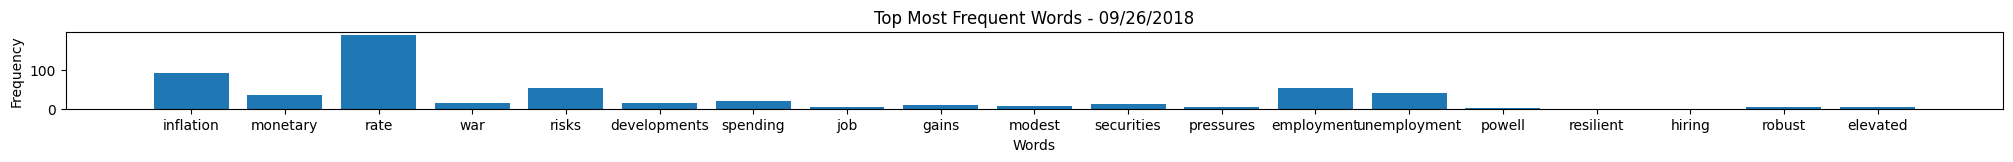

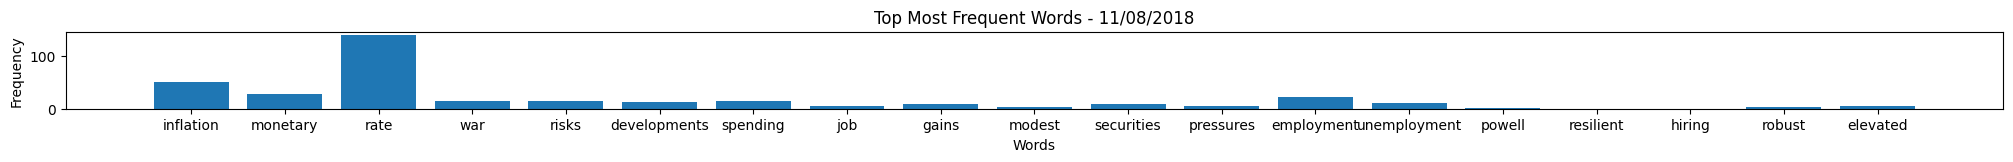

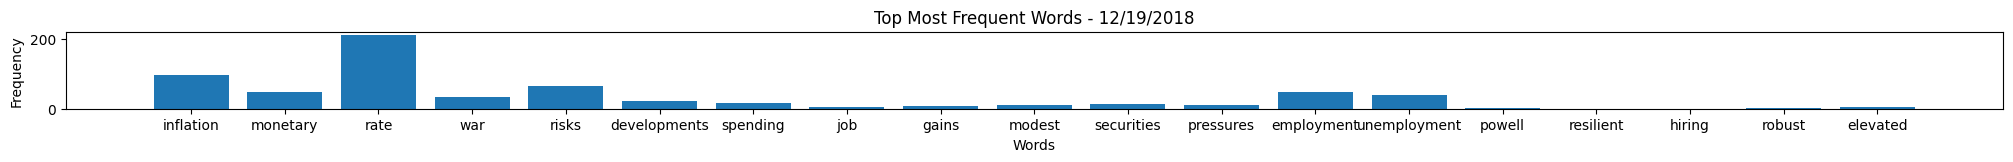

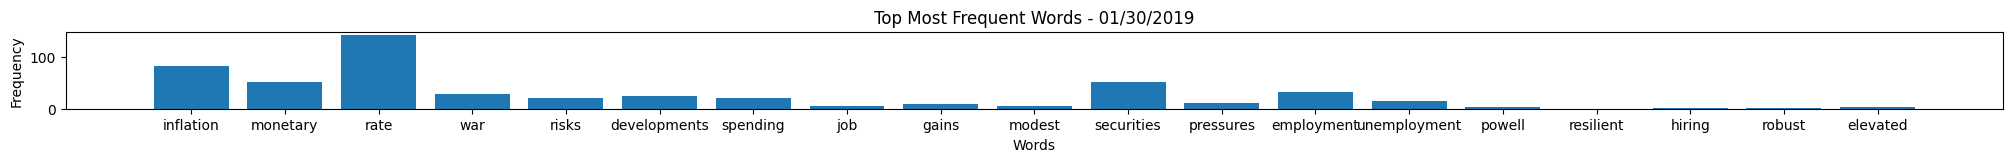

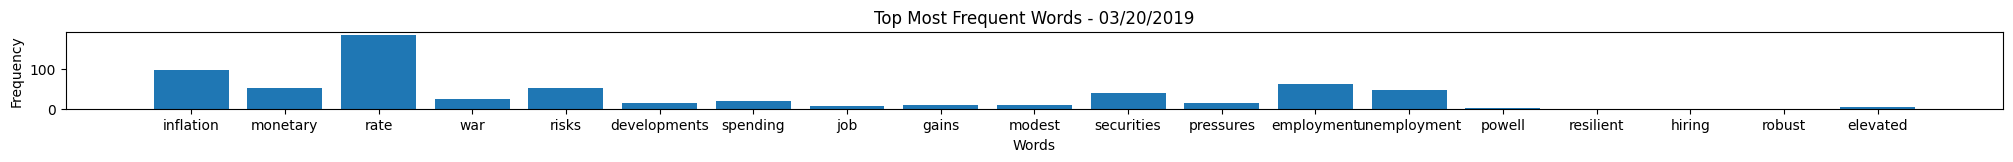

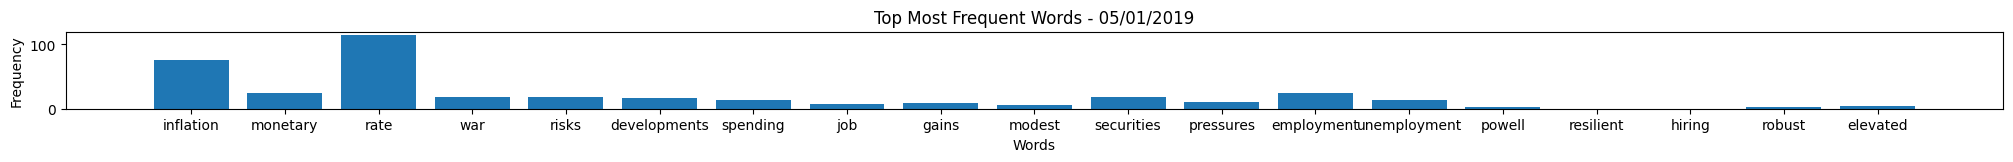

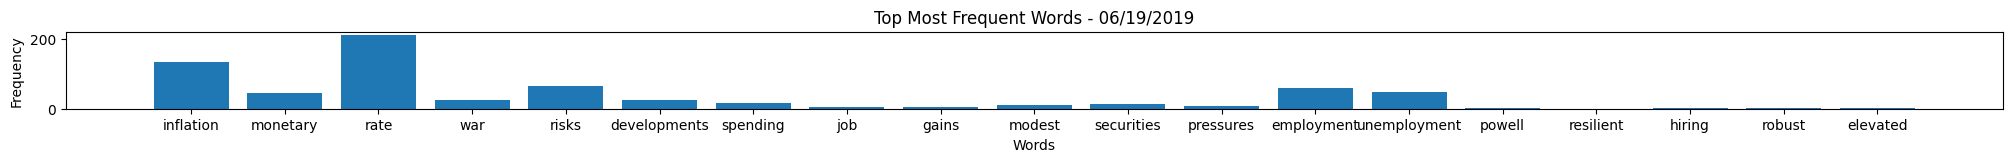

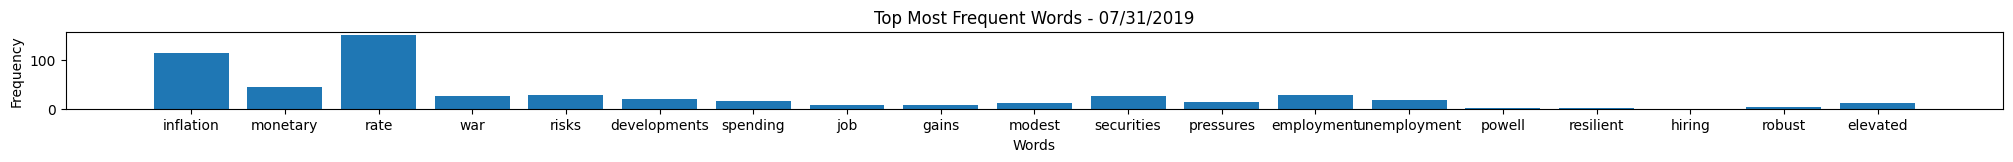

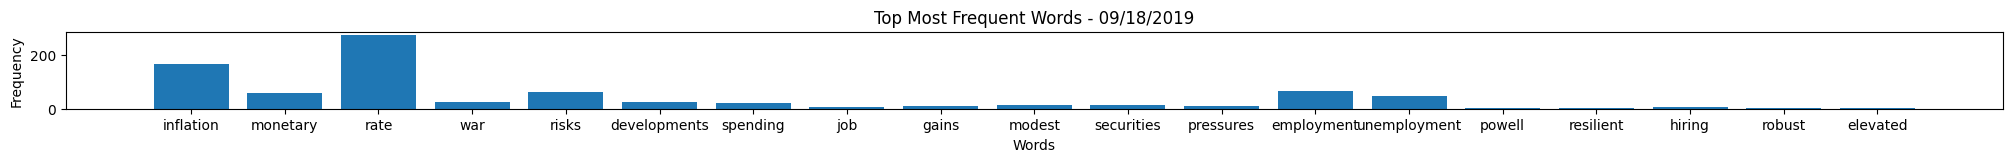

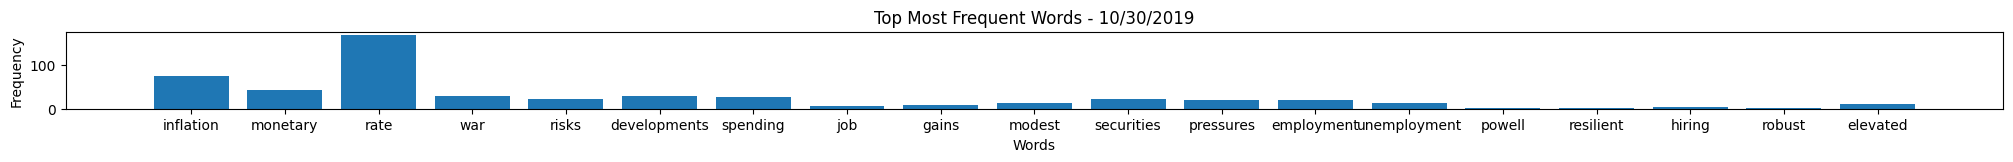

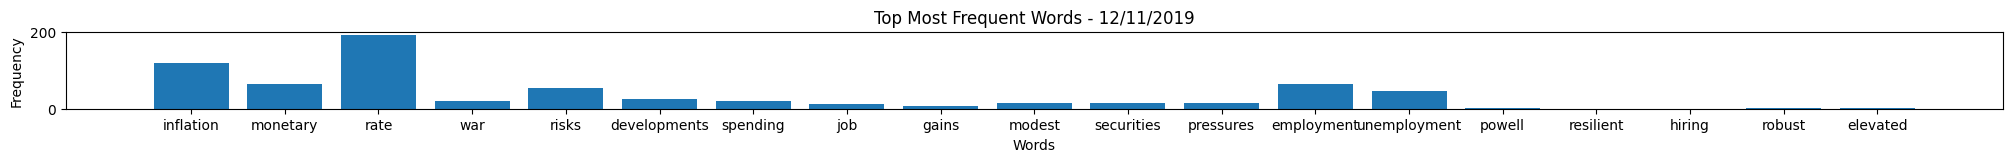

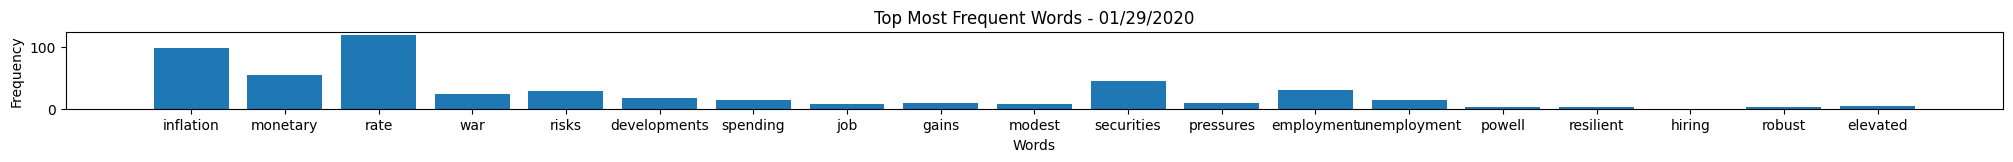

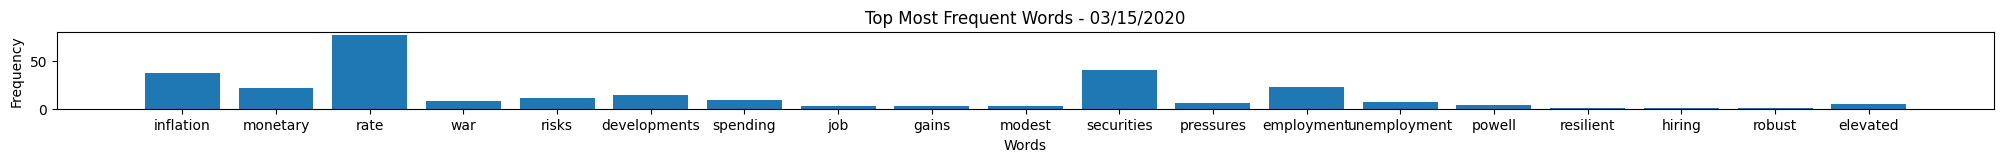

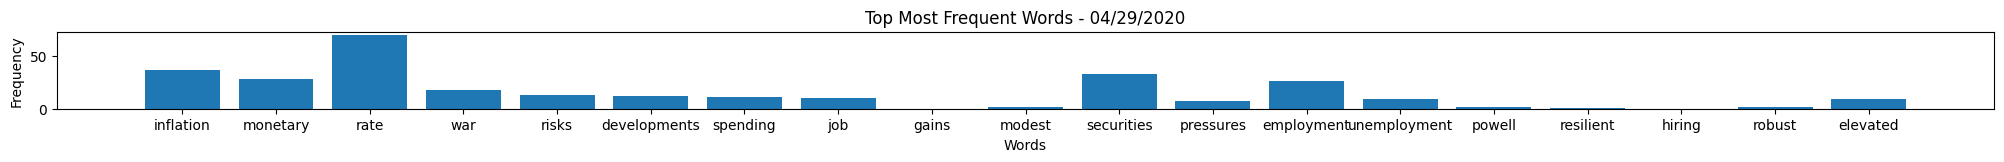

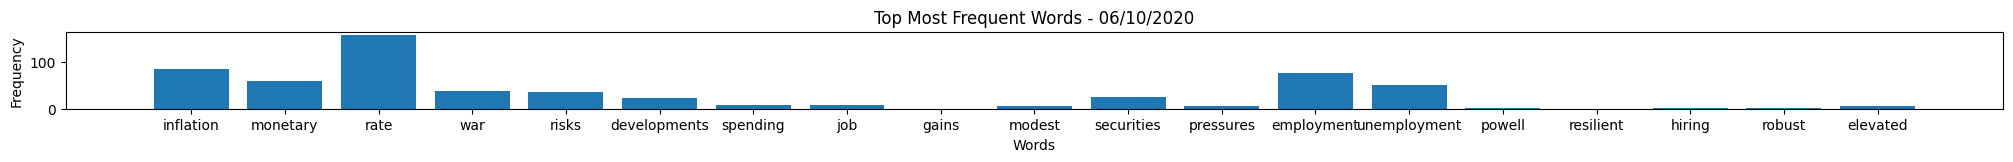

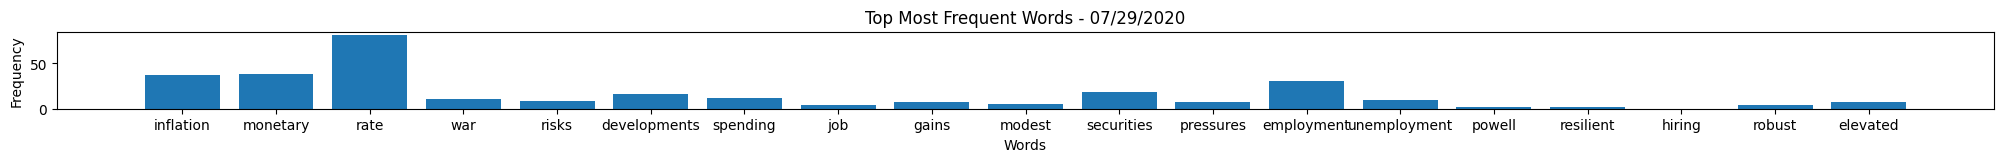

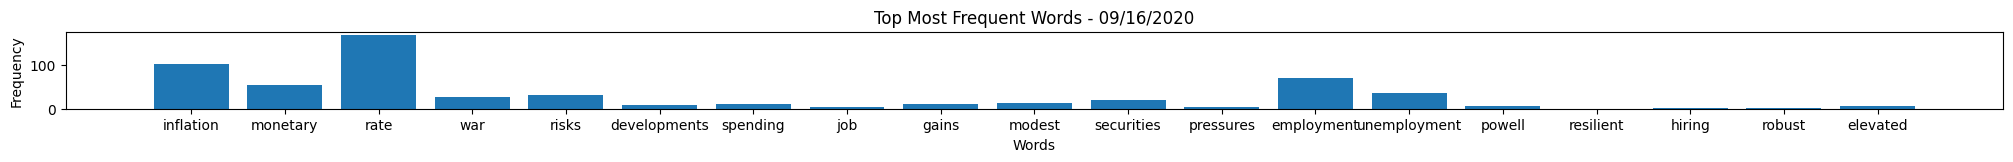

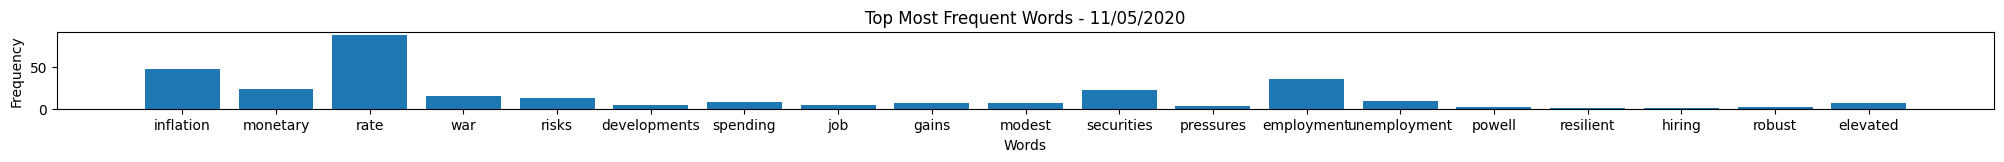

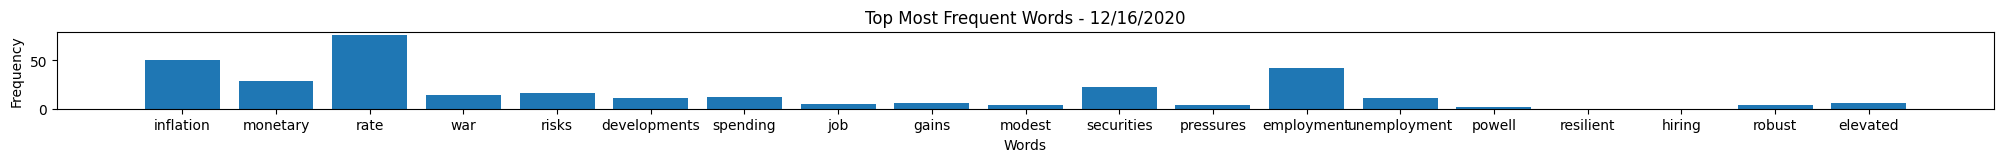

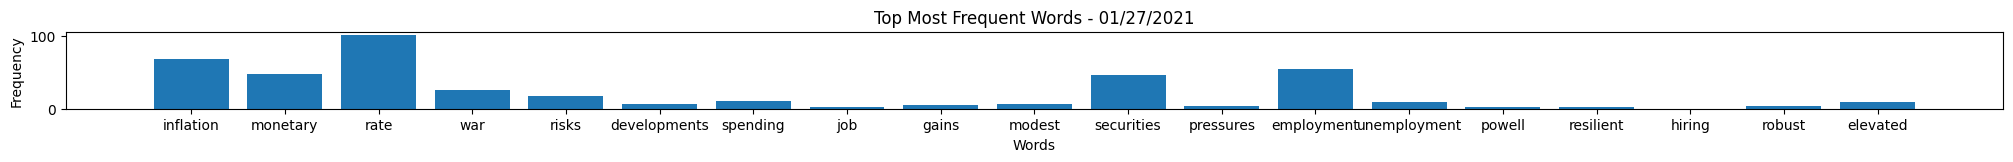

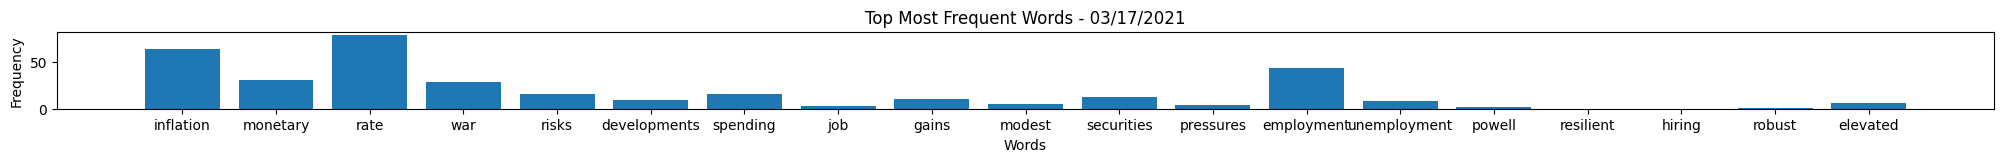

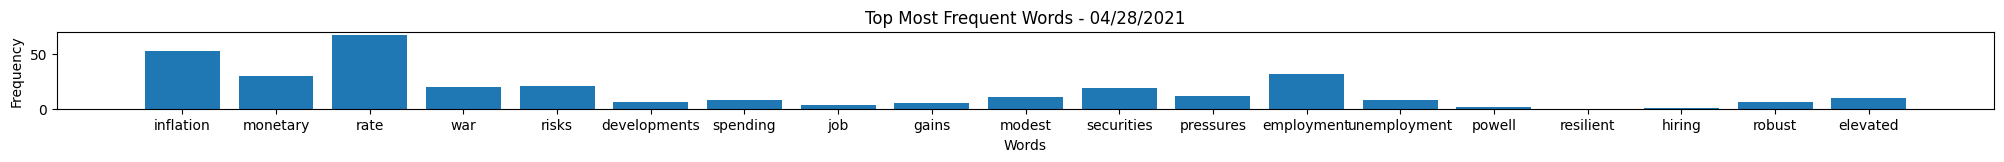

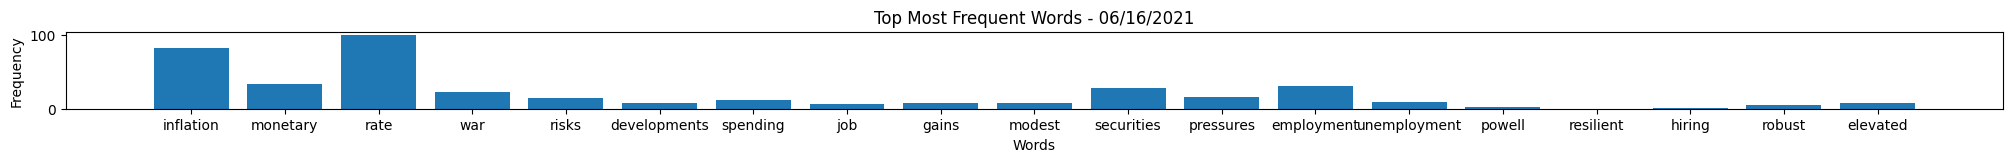

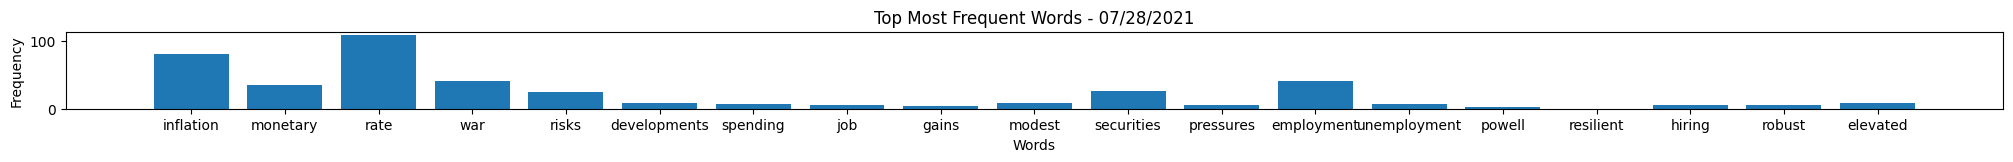

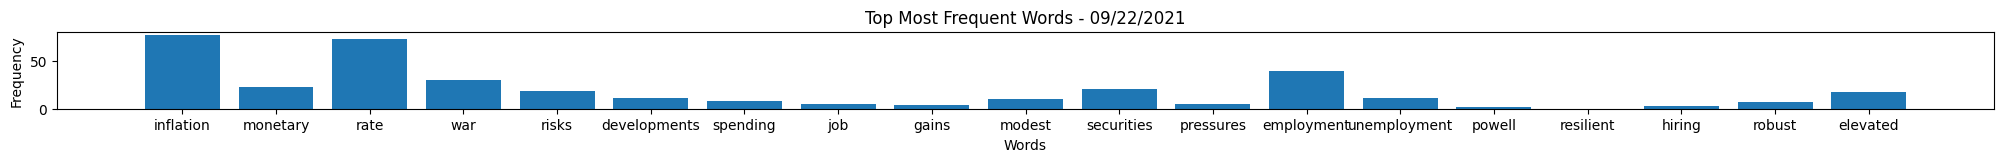

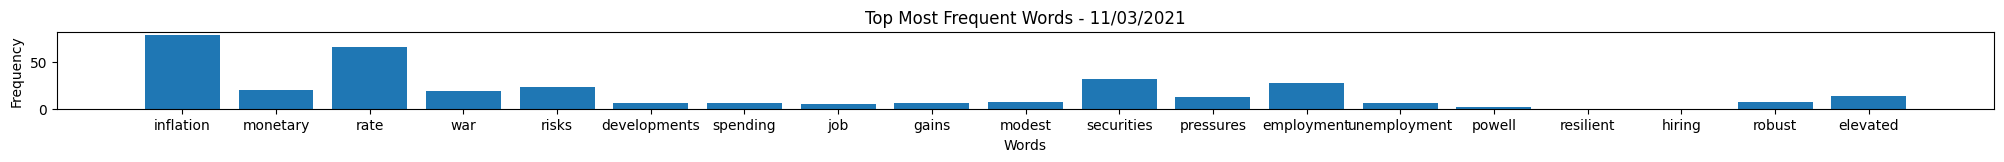

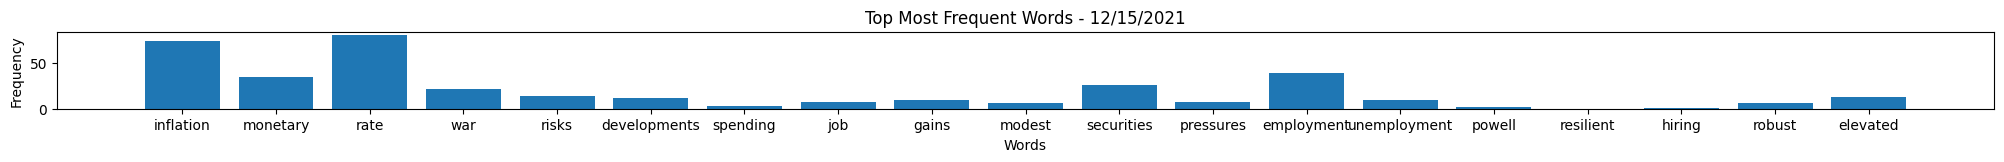

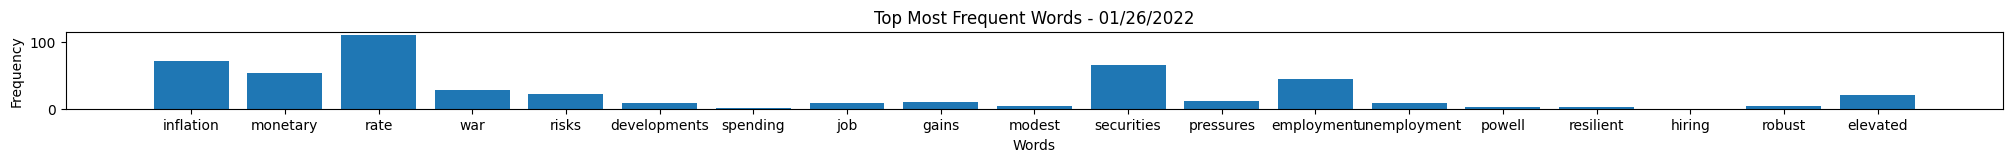

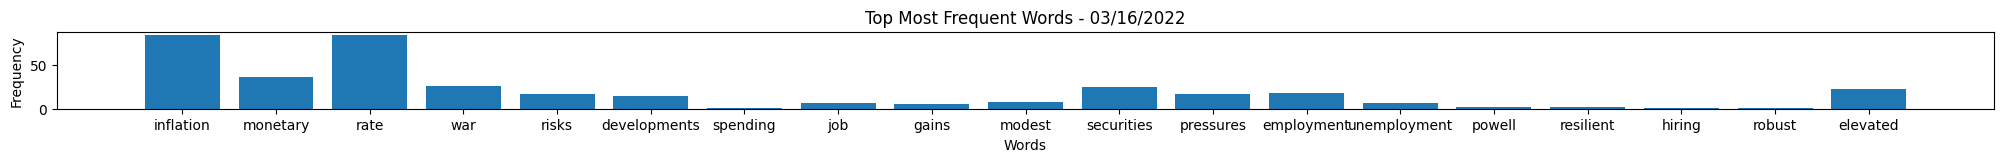

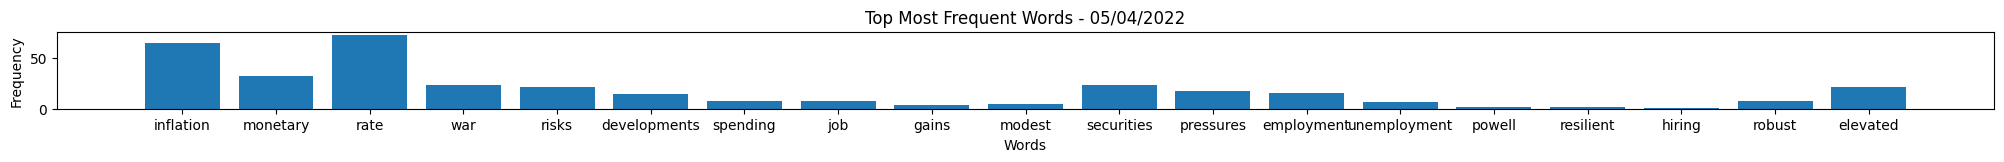

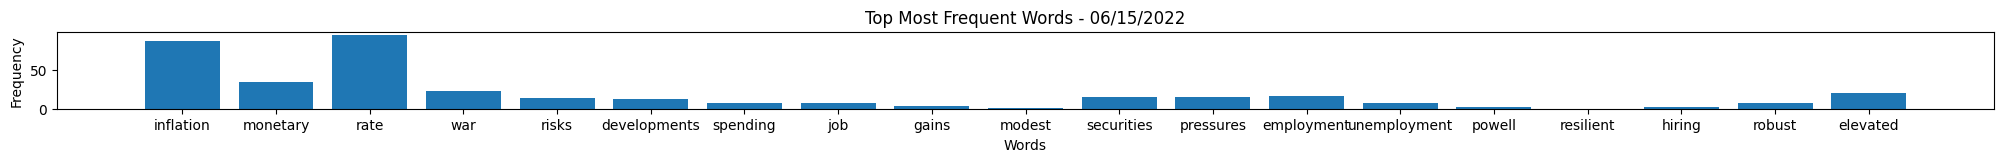

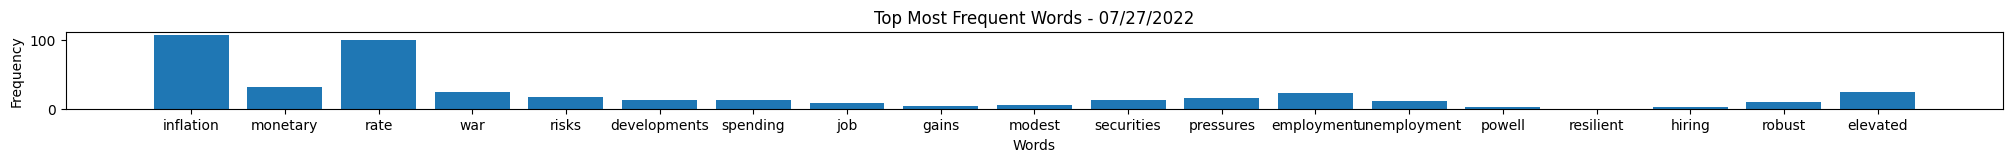

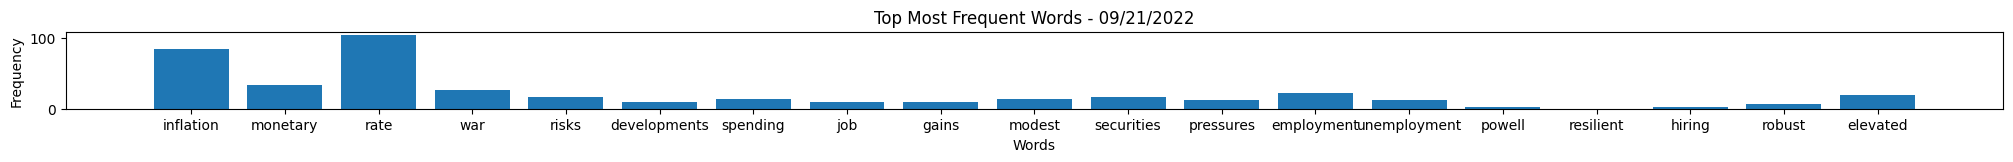

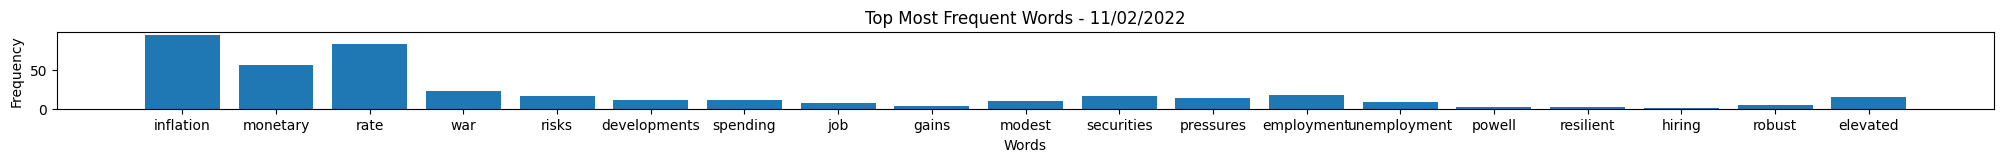

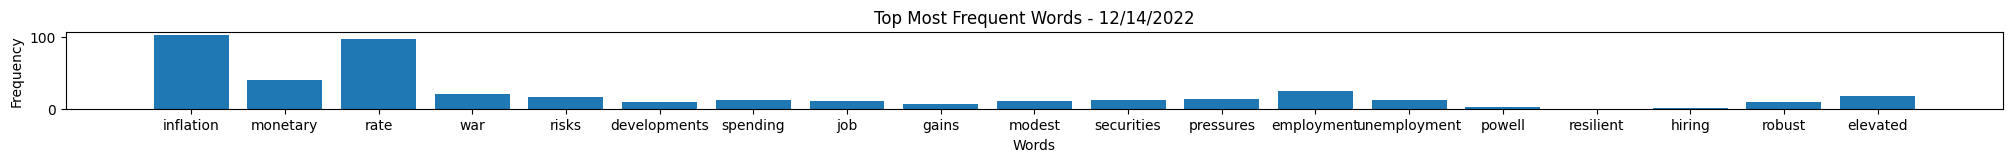

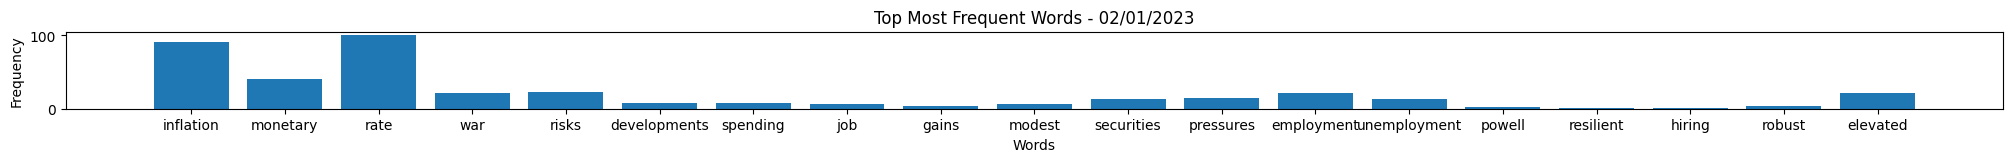

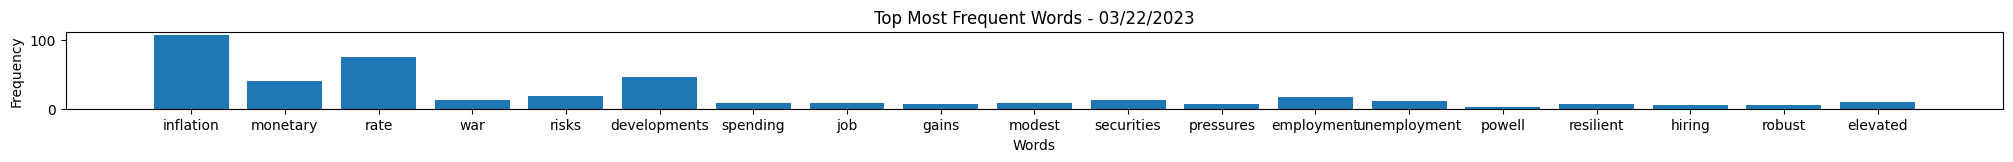

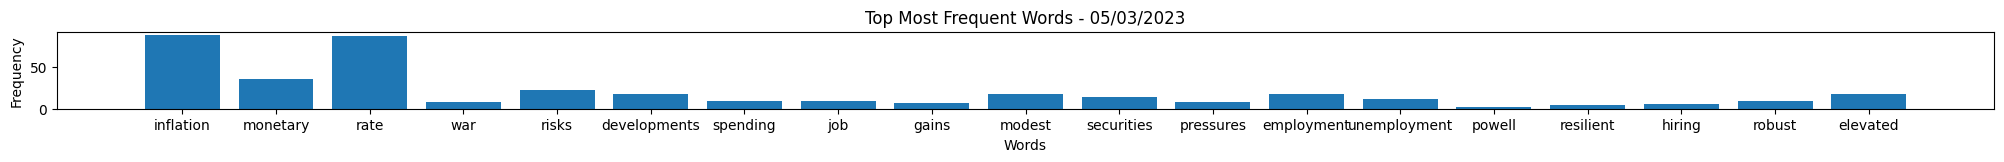

In [19]:
import matplotlib.pyplot as plt

feds = all_clean
target_words = ['inflation','monetary','rate','war','risks','developments','spending','job','gains','modest','securities','pressures','employment','unemployment','powell','resilient','hiring','robust','elevated']
dates=datess
for i, fed in enumerate(feds):
    word_frequencies = []
    for word in target_words:
        word_frequency = sum(1 for w in fed.lower().split() if word in w)
        word_frequencies.append(word_frequency)
    
    # Create a bar chart for each fed
    plt.figure(figsize=(25, 1))
    plt.bar(target_words, word_frequencies)
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    #plt.title("Frequency of Target Words in Fed {}".format(i+1))
    plt.title("Top Most Frequent Words - {}".format(dates[i]))

plt.show()

In [20]:
# ###function to plot most frequent bigrams on a individual piece of text
# import nltk
# from nltk import FreqDist
# from nltk.util import ngrams
# import matplotlib.pyplot as plt

# def plot_most_frequent_bigrams_indi(text, num=10):
#     # Tokenize the text into words
#     tokens = nltk.word_tokenize(text)
    
#     # Generate bigrams
#     bigrams = list(ngrams(tokens, 2))
    
#     # Calculate the frequency distribution of bigrams
#     freq_dist = FreqDist(bigrams)
    
#     # Get the most frequent bigrams
#     top_bigrams = freq_dist.most_common(num)
    
#     # Extract the bigram and frequency values
#     bigrams, frequencies = zip(*top_bigrams)
    
#     # Plot the most frequent bigrams
#     plt.figure(figsize=(10, 6))
#     plt.barh(range(len(bigrams)), frequencies, align='center')
#     plt.yticks(range(len(bigrams)), [' '.join(bigram) for bigram in bigrams])
#     plt.xlabel('Frequency')
#     plt.ylabel('Bigram')
#     plt.title(f'Top {num} Most Frequent Bigrams')
#     plt.show()
# exclude=[('conference','final'),('chair','powells'),('chair','powell'),('chairman','powell'),('press','conference'),('powells','press'),('chairman','powells'),('powell','know'),('know','think'),('mr','chairman'),('let','say'),('would','say'),('long','run'),('second','question')]    


In [42]:
#most frequent words across the entire corpus, ie. all the rows of clean text

def plot_most_frequent_bigrams_all_corpus(texts, num=10, exclude=[]):
    all_bigrams = []
    
    # Process each text in the list
    for text in texts:
        # Tokenize the text into words
        tokens = nltk.word_tokenize(text)
        
        # Generate bigrams
        bigrams = list(ngrams(tokens, 2))
        
        all_bigrams.extend(bigrams)
    
    # Calculate the frequency distribution of bigrams
    freq_dist = FreqDist(all_bigrams)
    print(freq_dist)
    # Exclude specific bigrams
    for e in exclude:
        freq_dist.pop(e, None)
    
    # Get the most frequent bigrams
    top_bigrams = freq_dist.most_common(num)
    
    # Extract the bigram and frequency values
    bigrams, frequencies = zip(*top_bigrams)
    
    # Plot the most frequent bigrams
    plt.figure(figsize=(40, 20))
    plt.barh(range(len(bigrams)), frequencies, align='center')
    plt.yticks(range(len(bigrams)), [' '.join(bigram) for bigram in bigrams])
    plt.xlabel('Frequency')
    plt.ylabel('Bigram')
    plt.title('TopFrequent Bigrams')
    plt.show()
###important bigrams to be excluded_all
exclude=[('range','federal'),('pce','price'),('path','federal'),('participants','commented'),('several','participants'),('stance','monetary'),('recent','months'),('page','federal'),('new','york'),('associate','director'),('november','chair'),('f','ed'),('march','chair'),('december','chair'),('thank','chair'),('july','chair'),('june','chair'),('hi','chair'),('january','chair'),('last','year'),('little','bit'),('next','year'),('things','like'),('get','back'),('final','page'),('conference','final'),('chair','powells'),('chair','powell'),('chairman','powell'),('press','conference'),('powells','press'),('chairman','powells'),('powell','know'),('know','think'),('mr','chairman'),('let','say'),('would','say'),('long','run'),('second','question')]    


<FreqDist with 90682 samples and 278668 outcomes>


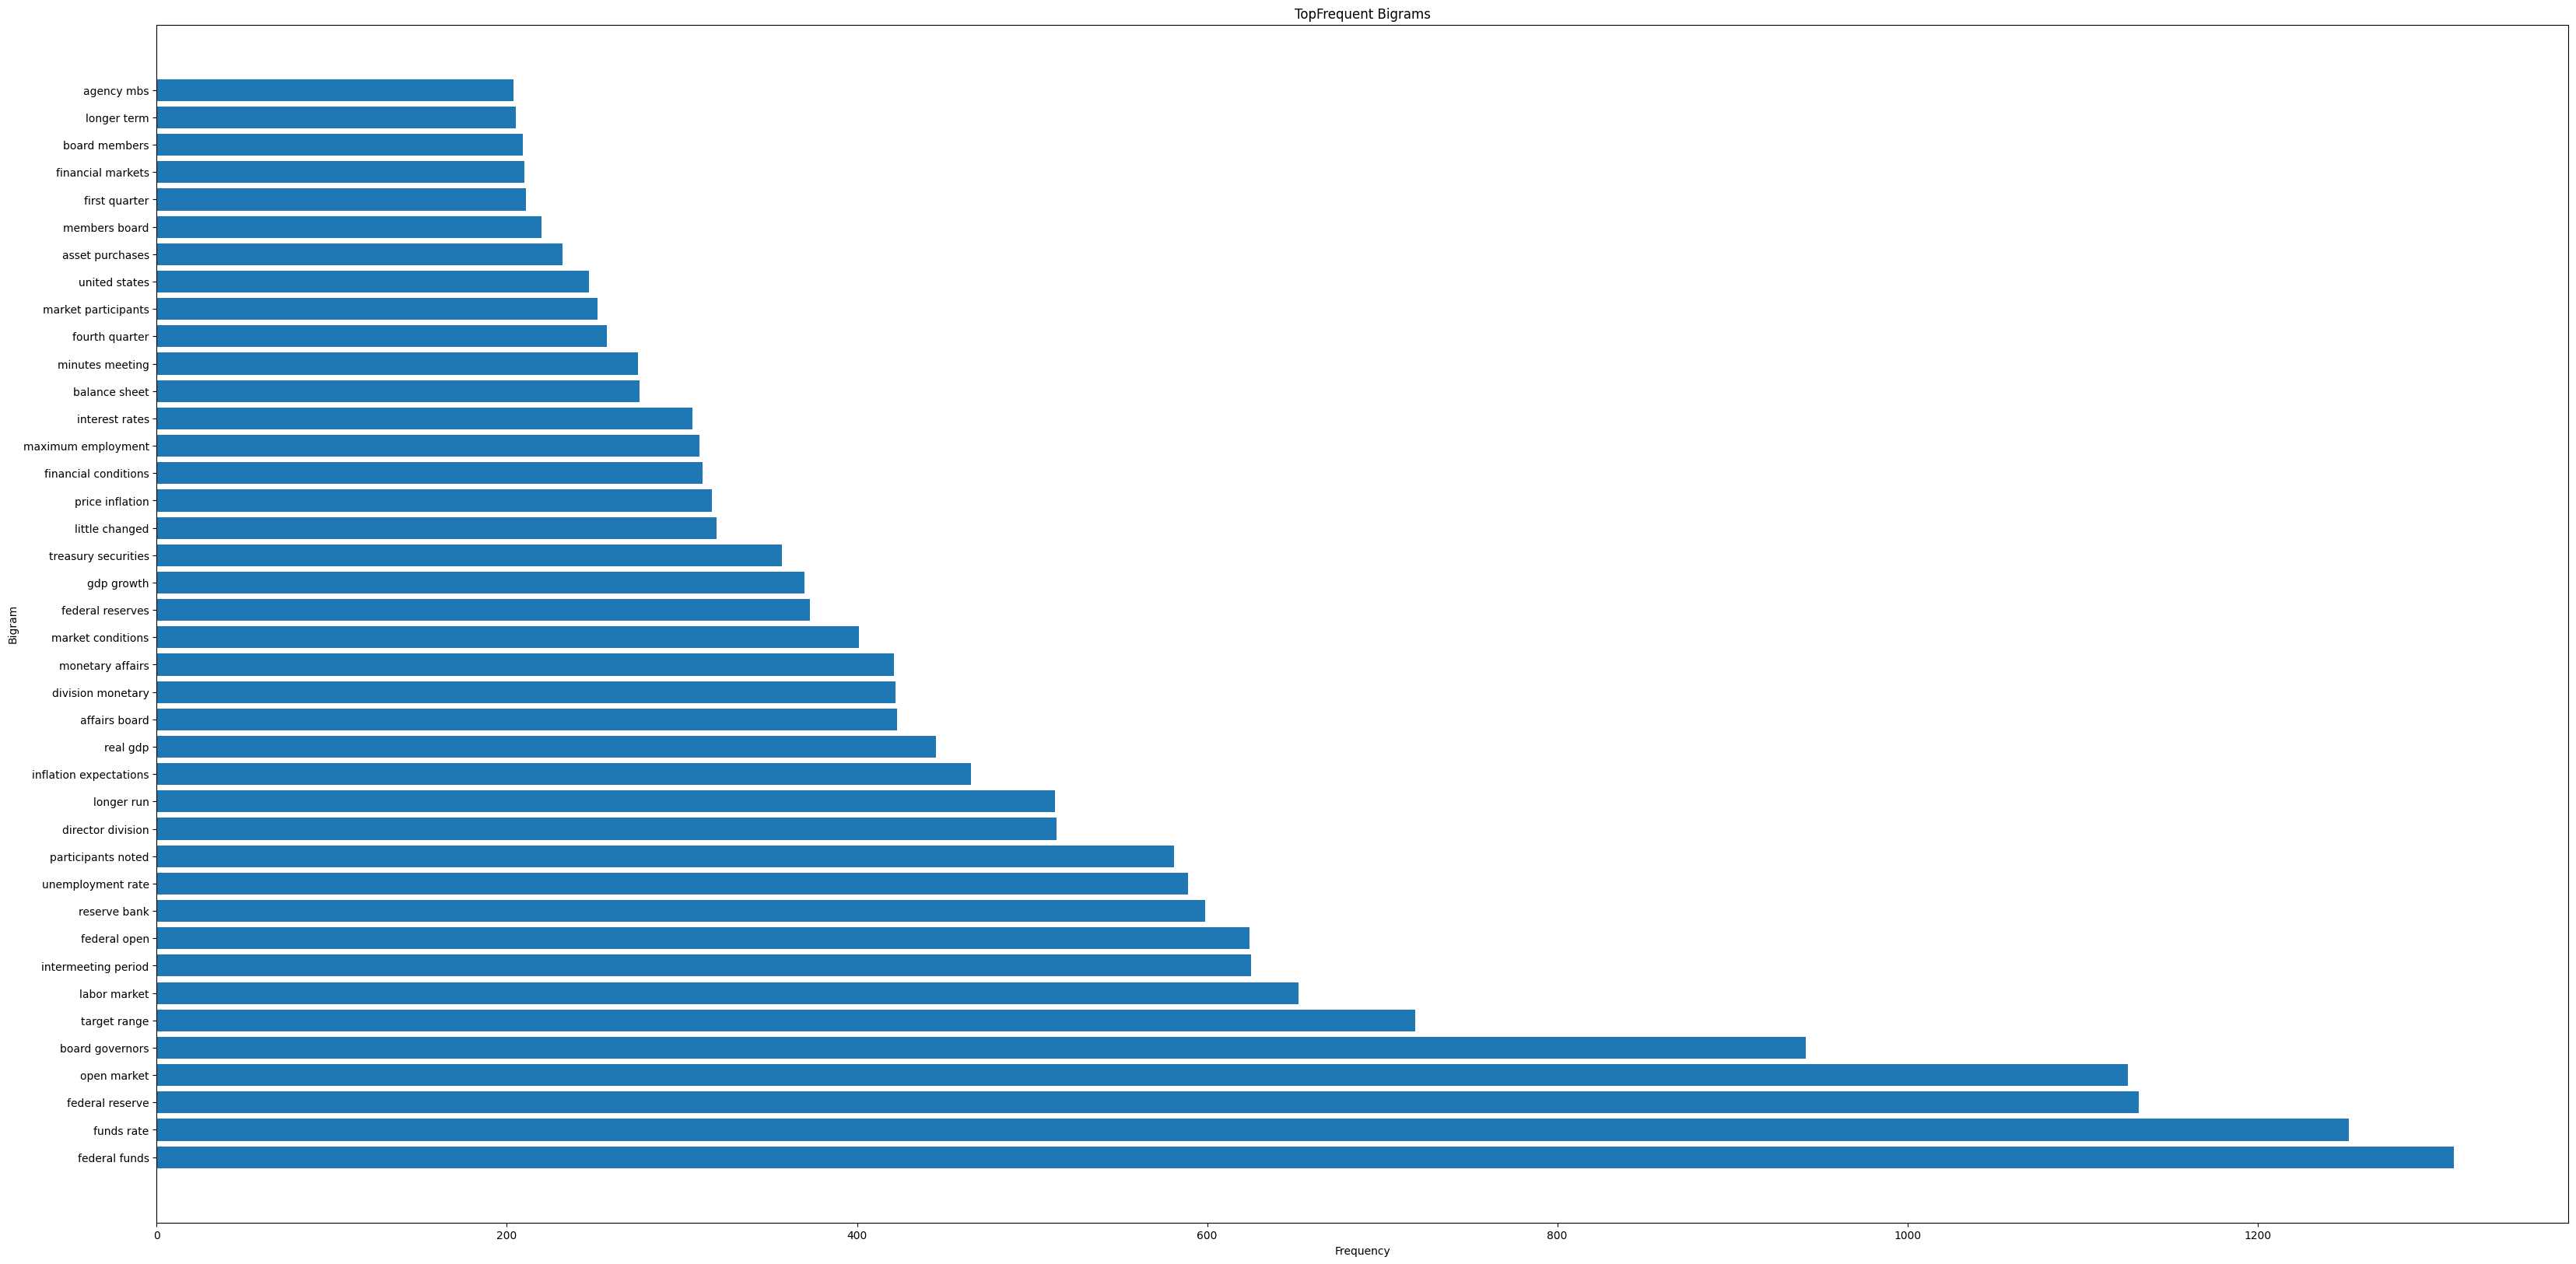

In [43]:
all_clean=list(df['clean_text'])
texts= all_clean
plot_most_frequent_bigrams_all_corpus(texts, num=40, exclude=exclude)

In [48]:
#function to plot the bigrams over a list of texts, ie. individually on each row of clean text
titles= list(df['DATE'])
exclude=[('federal','funds'),('president','federal'),('swap','arrangements'),('intermeeting','period'),('system','open'),('range','federal'),('pce','price'),('path','federal'),('participants','commented'),('several','participants'),('stance','monetary'),('recent','months'),('page','federal'),('new','york'),('associate','director'),('november','chair'),('f','ed'),('march','chair'),('december','chair'),('thank','chair'),('july','chair'),('june','chair'),('hi','chair'),('january','chair'),('last','year'),('little','bit'),('next','year'),('things','like'),('get','back'),('final','page'),('conference','final'),('chair','powells'),('chair','powell'),('chairman','powell'),('press','conference'),('powells','press'),('chairman','powells'),('powell','know'),('know','think'),('mr','chairman'),('let','say'),('would','say'),('long','run'),('second','question')]    
texts=all_clean
def plot_most_frequent_bigrams(texts, num=10, exclude=[]):
    for i, text in enumerate(texts):
        all_bigrams = []
        
        # Tokenize the text into words
        tokens = nltk.word_tokenize(text)
        
        # Generate bigrams
        bigrams = list(ngrams(tokens, 2))
        all_bigrams.extend(bigrams)
        
        # Calculate the frequency distribution of bigrams
        freq_dist = FreqDist(all_bigrams)
        print(freq_dist)
        # Exclude specific bigrams
        for excluded_bigram in exclude:
            freq_dist.pop(excluded_bigram, None)
        
        # Get the most frequent bigrams
        top_bigrams = freq_dist.most_common(num)
        
        # Extract the bigram and frequency values
        bigrams, frequencies = zip(*top_bigrams)
        
        # Plot the most frequent bigrams
        plt.figure(figsize=(10, 6))
        plt.barh(range(len(bigrams)), frequencies, align='center')
        plt.yticks(range(len(bigrams)), [' '.join(bigram) for bigram in bigrams])
        plt.xlabel('Frequency')
        plt.ylabel('Bigram')
        plt.title(titles[i])
        plt.show()


<FreqDist with 5407 samples and 7453 outcomes>


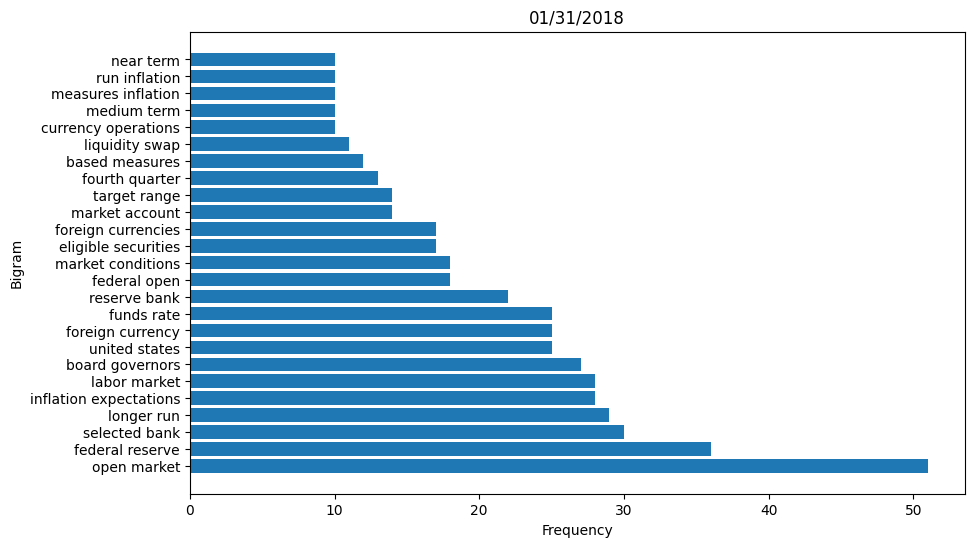

<FreqDist with 5156 samples and 7702 outcomes>


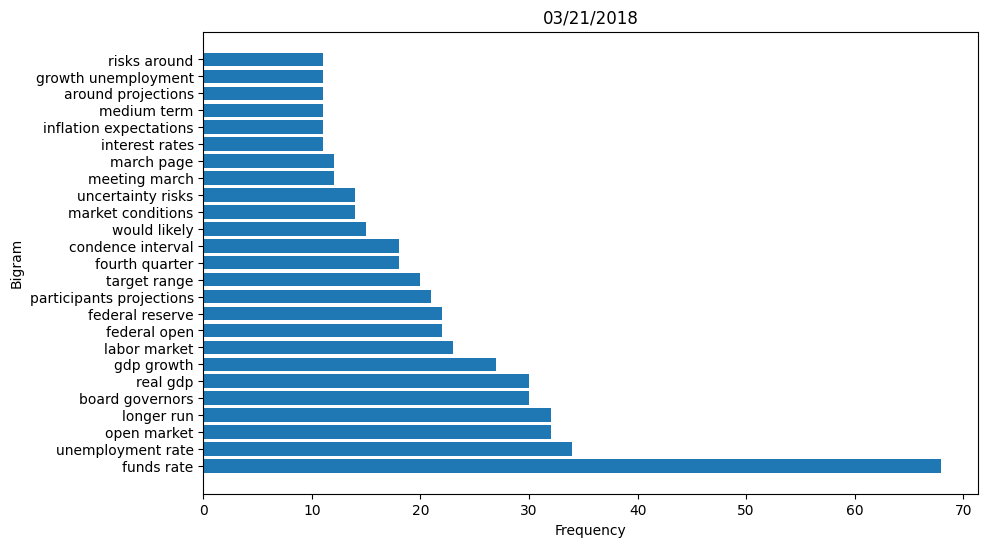

<FreqDist with 3672 samples and 4883 outcomes>


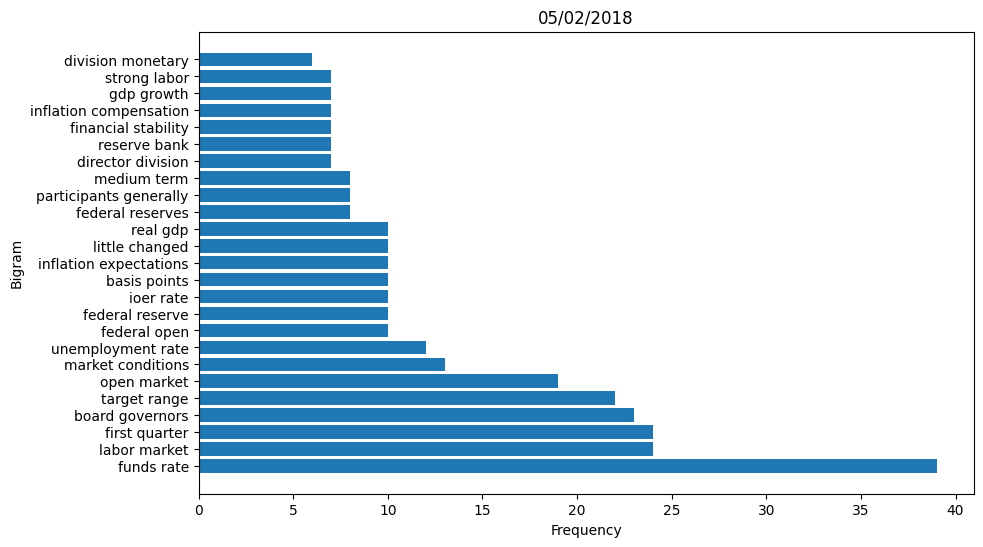

<FreqDist with 5042 samples and 7505 outcomes>


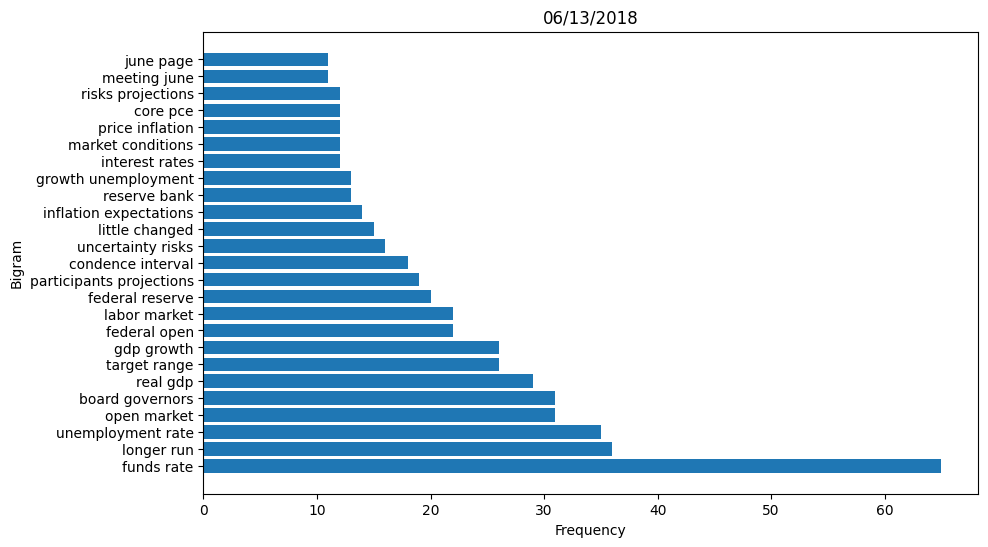

<FreqDist with 4047 samples and 5179 outcomes>


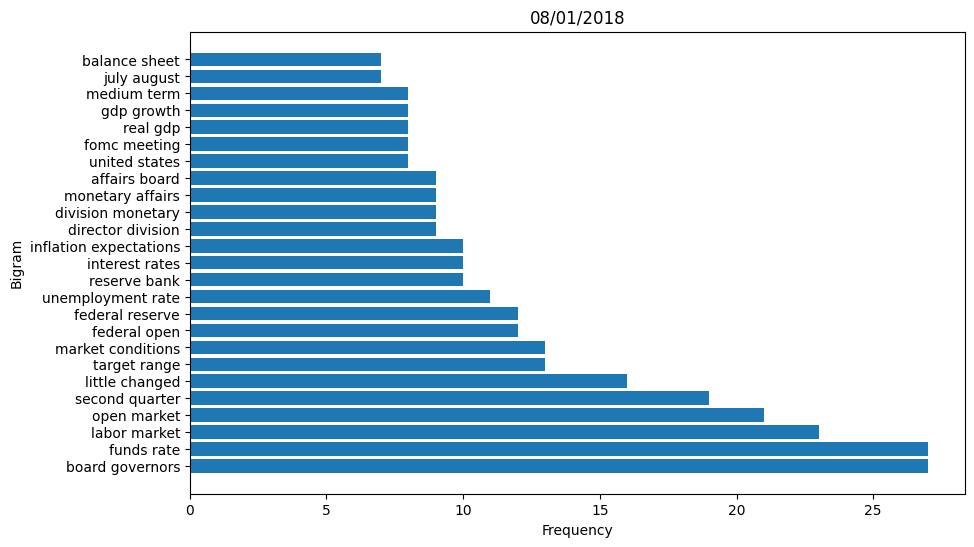

<FreqDist with 5121 samples and 7442 outcomes>


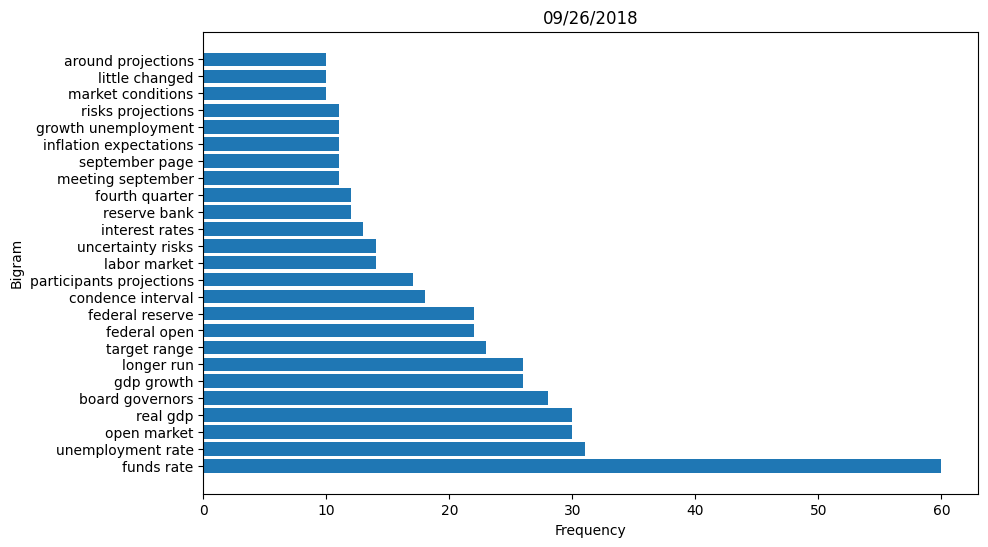

<FreqDist with 4116 samples and 5299 outcomes>


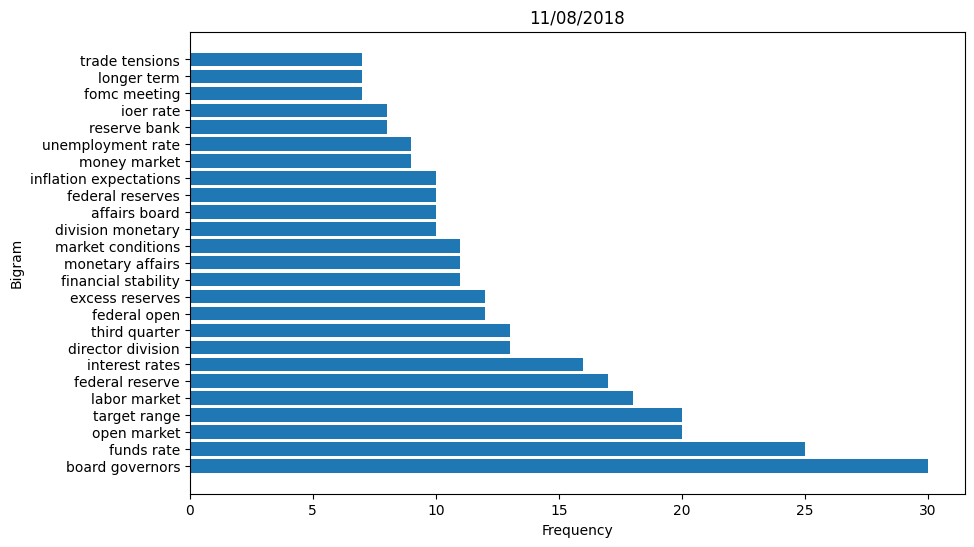

<FreqDist with 5714 samples and 8403 outcomes>


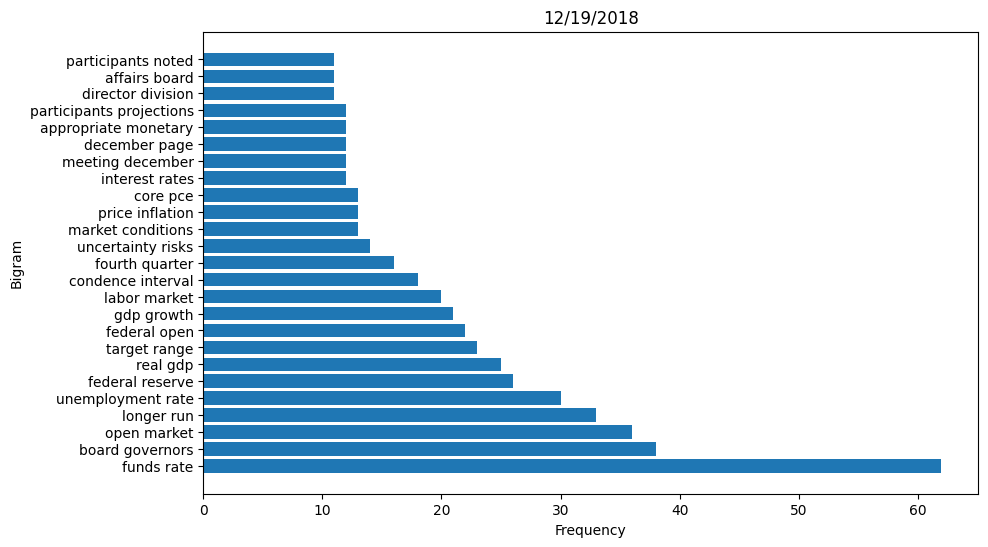

<FreqDist with 6121 samples and 8567 outcomes>


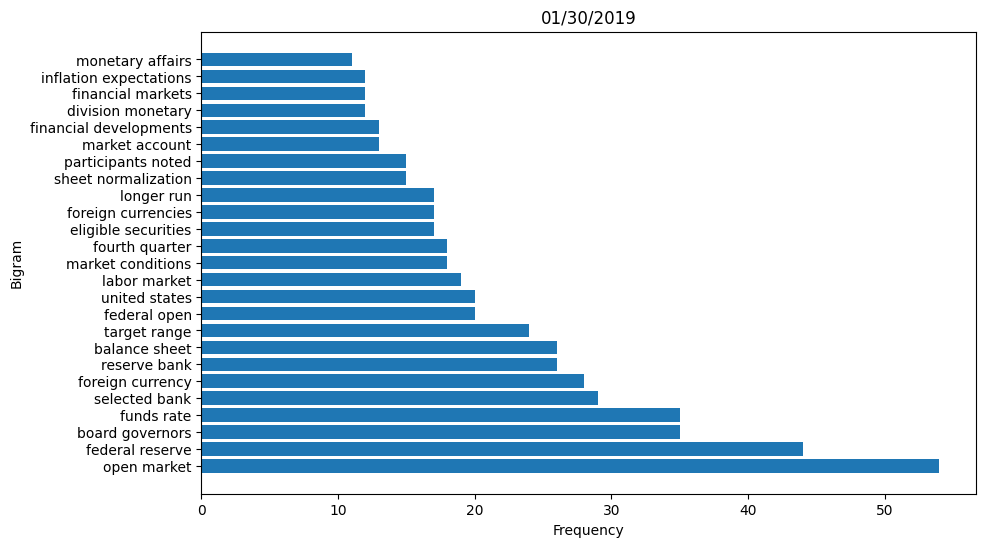

<FreqDist with 6280 samples and 9012 outcomes>


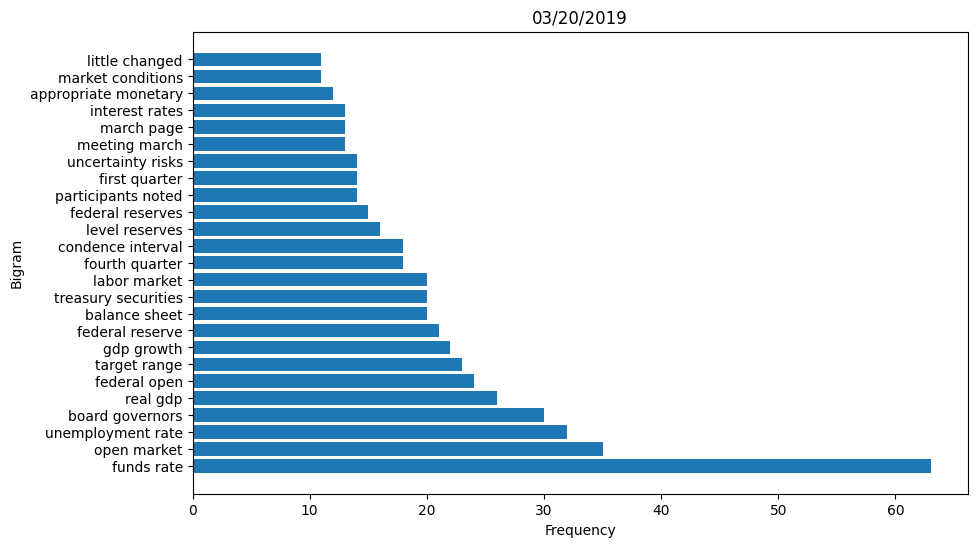

<FreqDist with 4420 samples and 5837 outcomes>


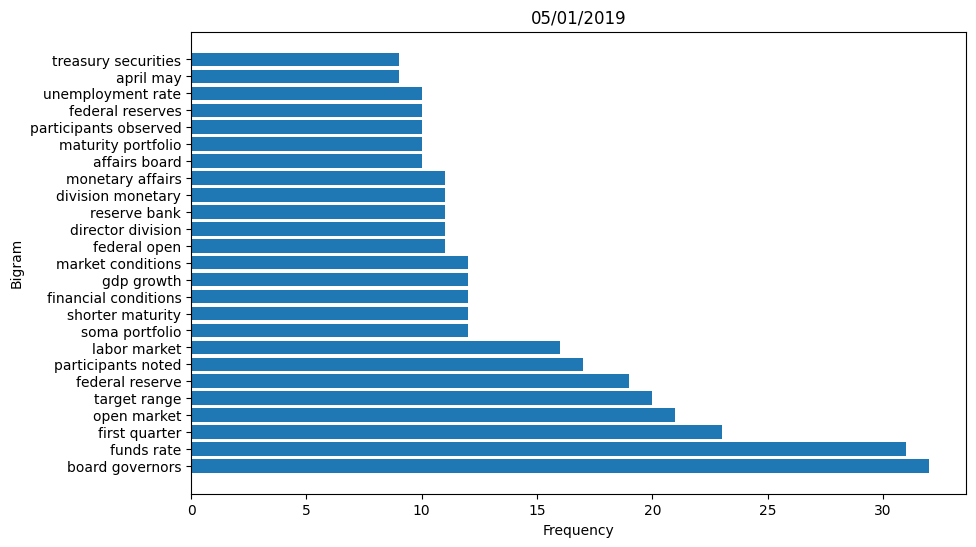

<FreqDist with 5710 samples and 8314 outcomes>


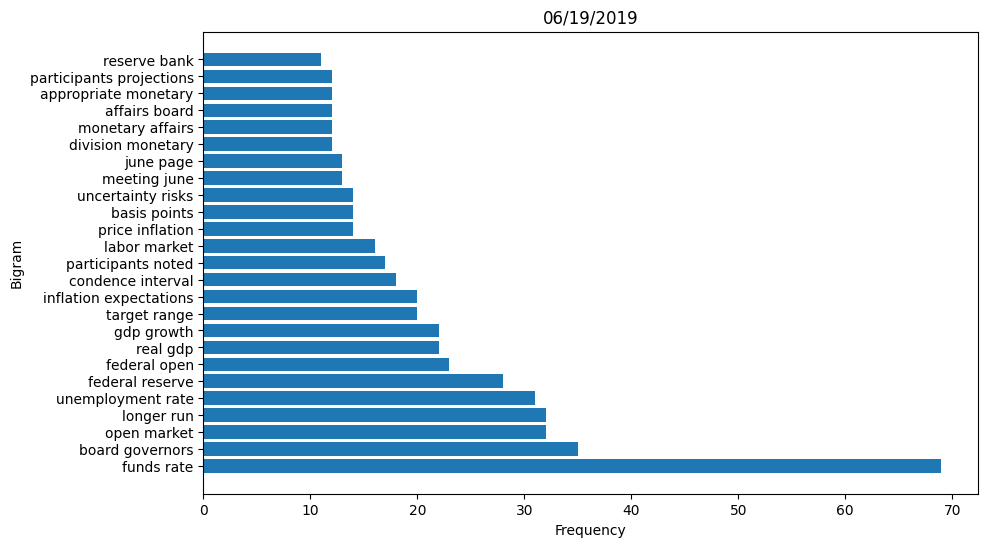

<FreqDist with 5025 samples and 6530 outcomes>


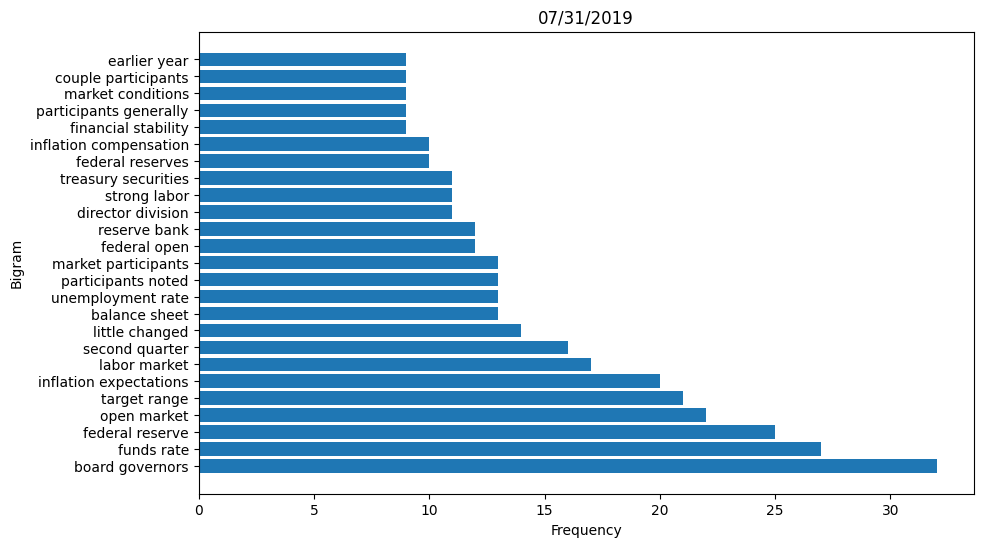

<FreqDist with 6781 samples and 9689 outcomes>


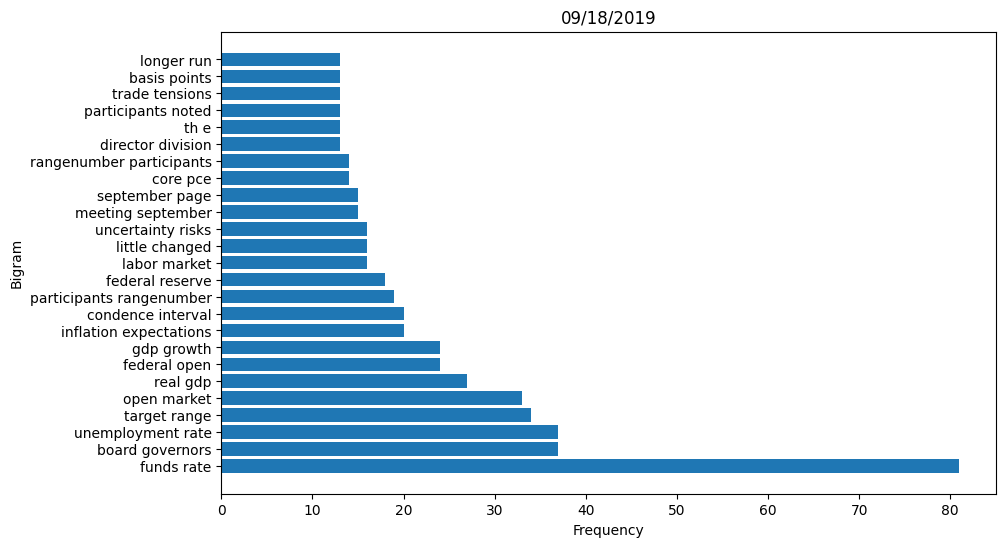

<FreqDist with 5722 samples and 7850 outcomes>


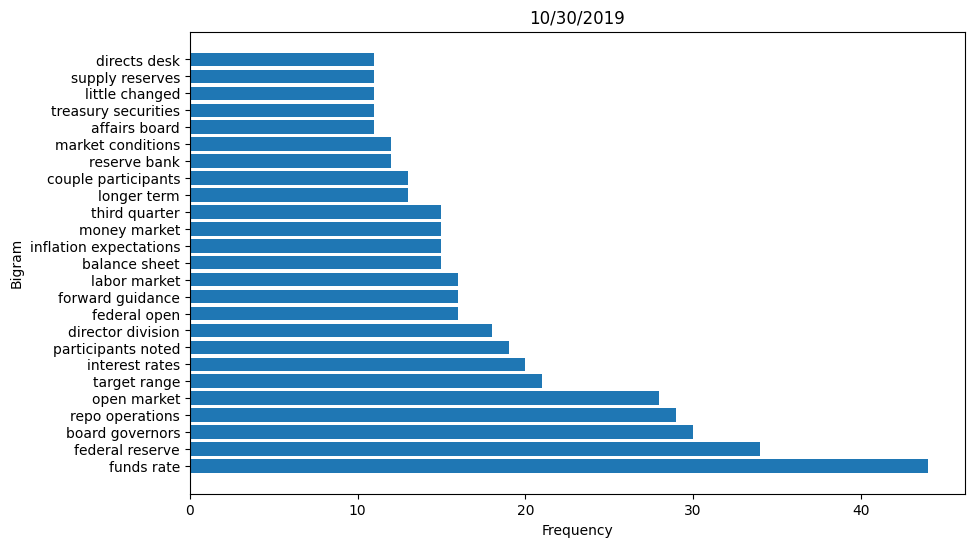

<FreqDist with 5677 samples and 8266 outcomes>


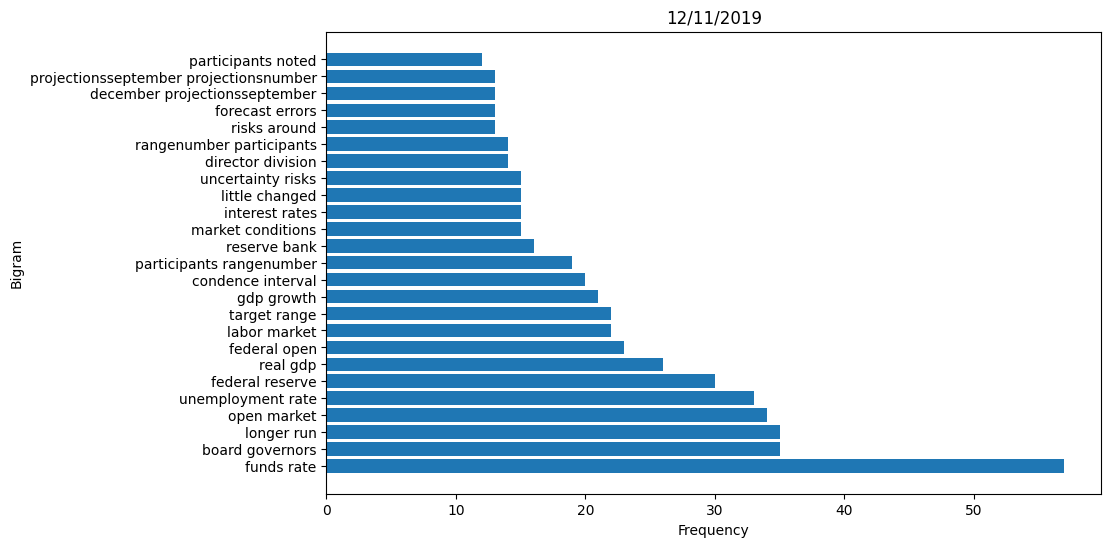

<FreqDist with 5877 samples and 8079 outcomes>


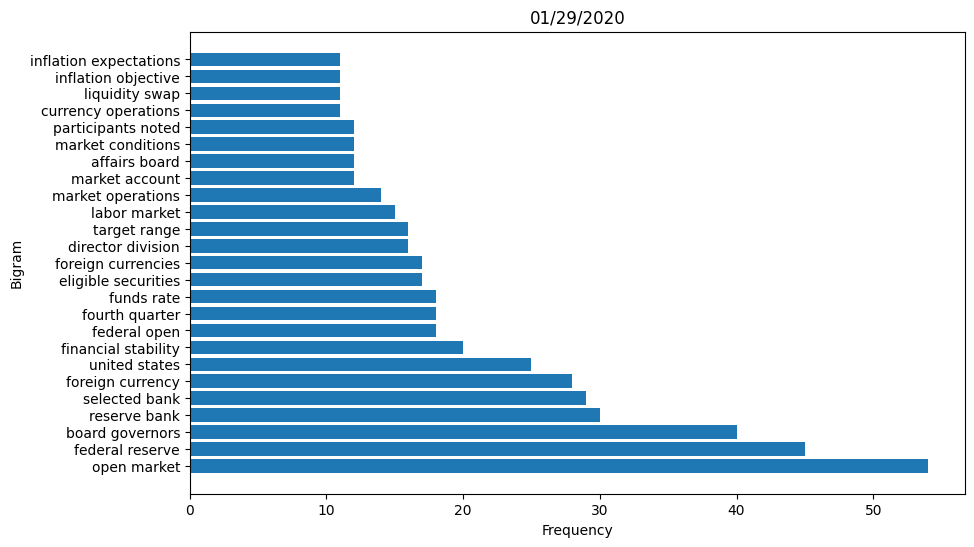

<FreqDist with 4528 samples and 6117 outcomes>


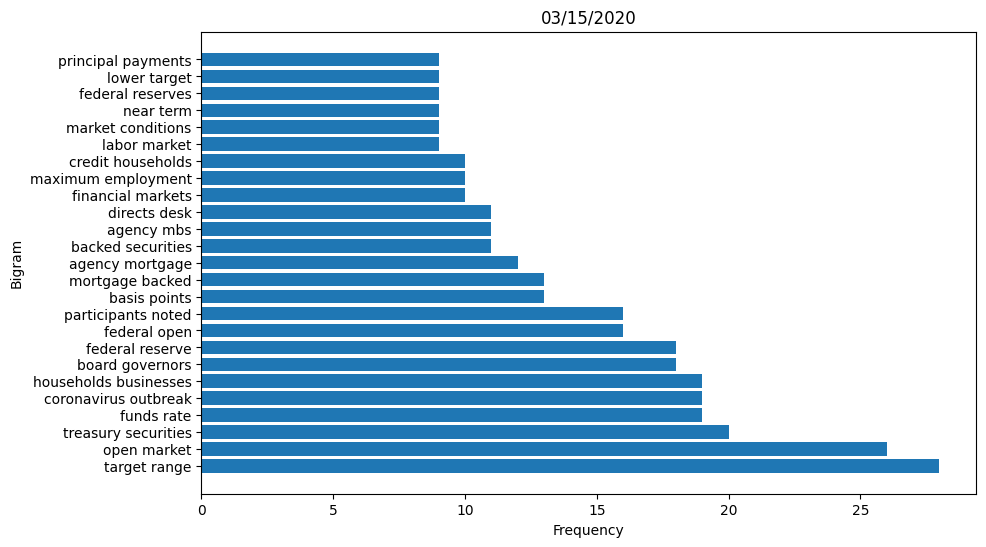

<FreqDist with 4530 samples and 6016 outcomes>


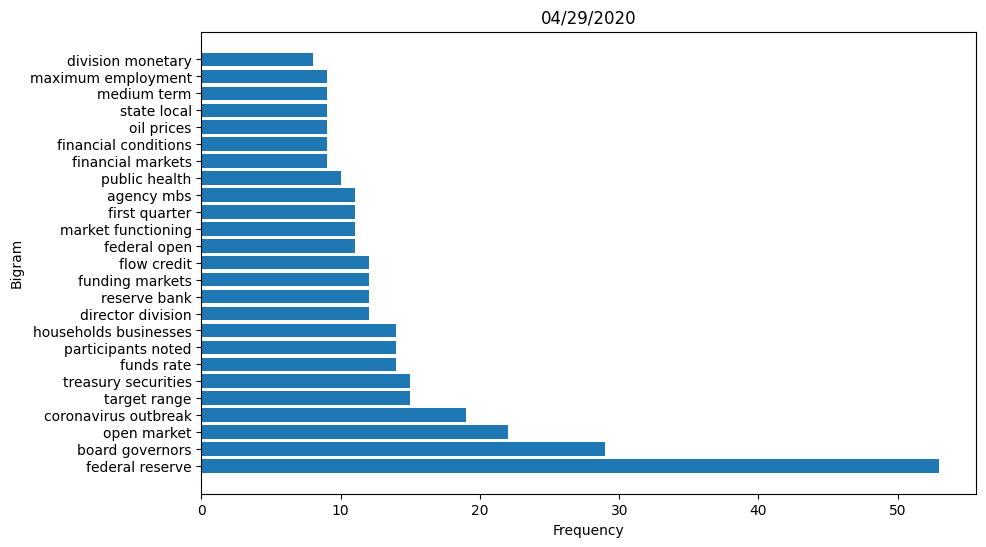

<FreqDist with 6043 samples and 8273 outcomes>


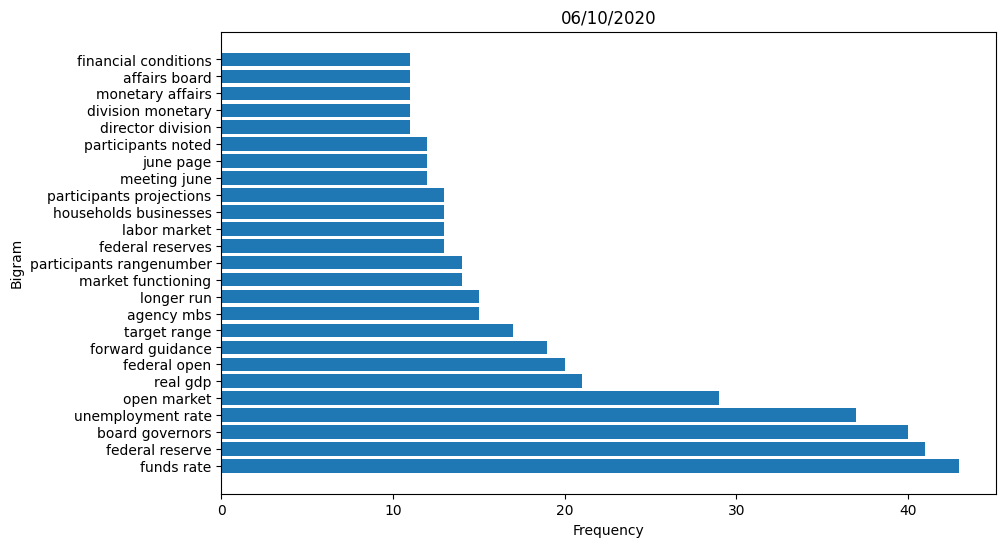

<FreqDist with 4428 samples and 5717 outcomes>


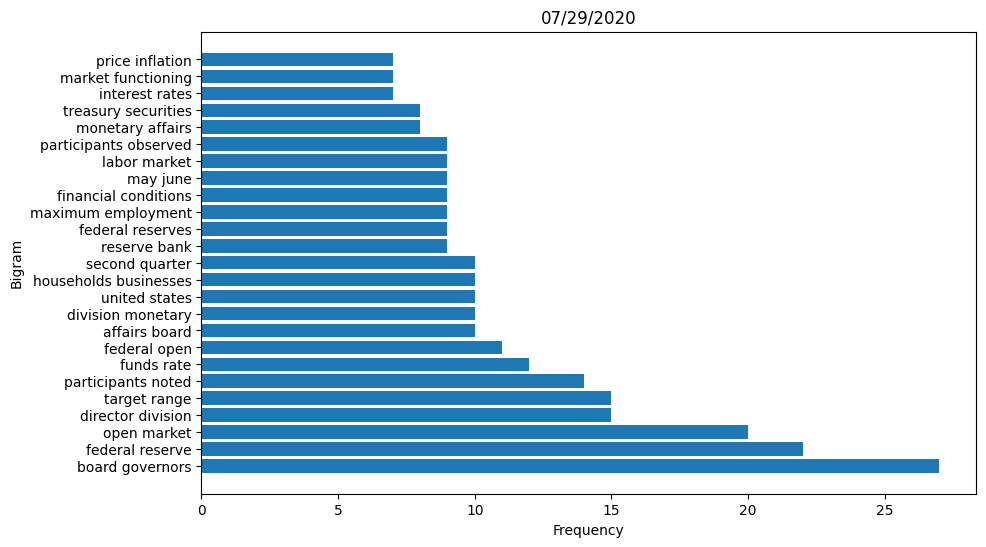

<FreqDist with 5946 samples and 8138 outcomes>


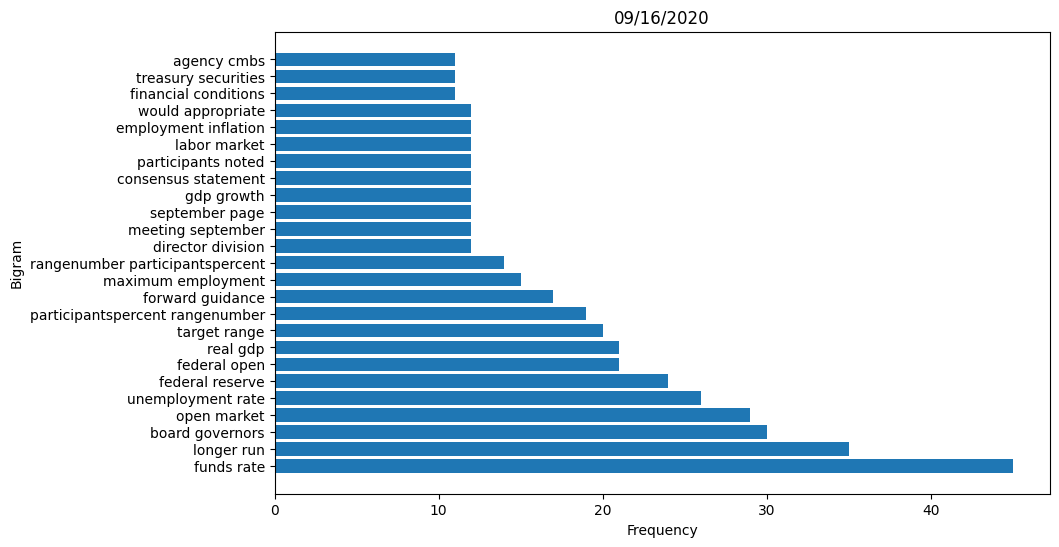

<FreqDist with 4509 samples and 5917 outcomes>


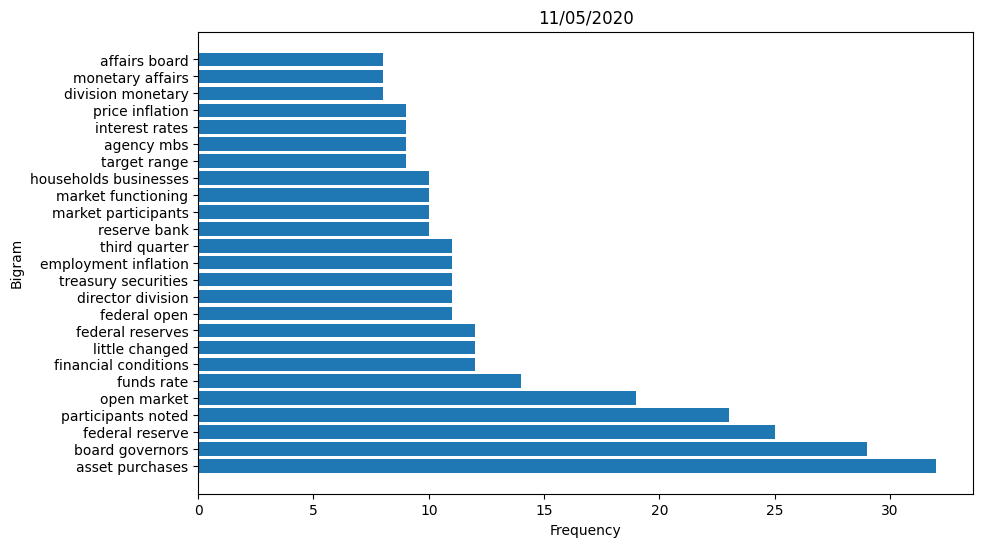

<FreqDist with 3989 samples and 5241 outcomes>


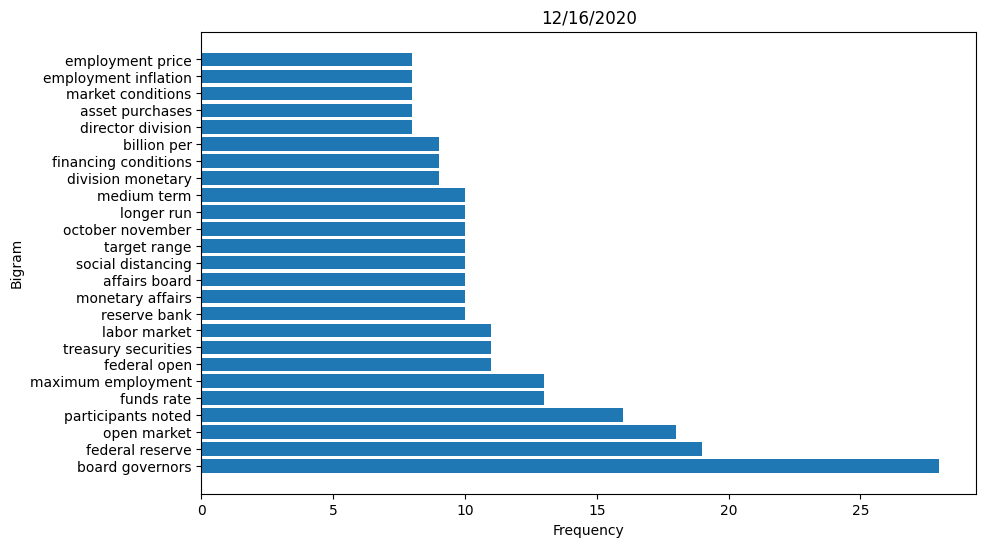

<FreqDist with 5543 samples and 7763 outcomes>


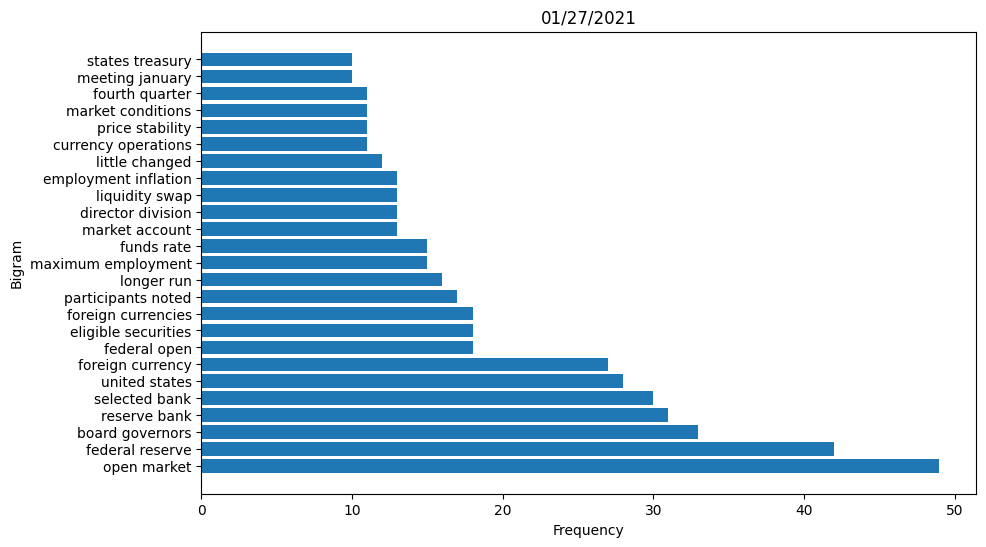

<FreqDist with 4113 samples and 5486 outcomes>


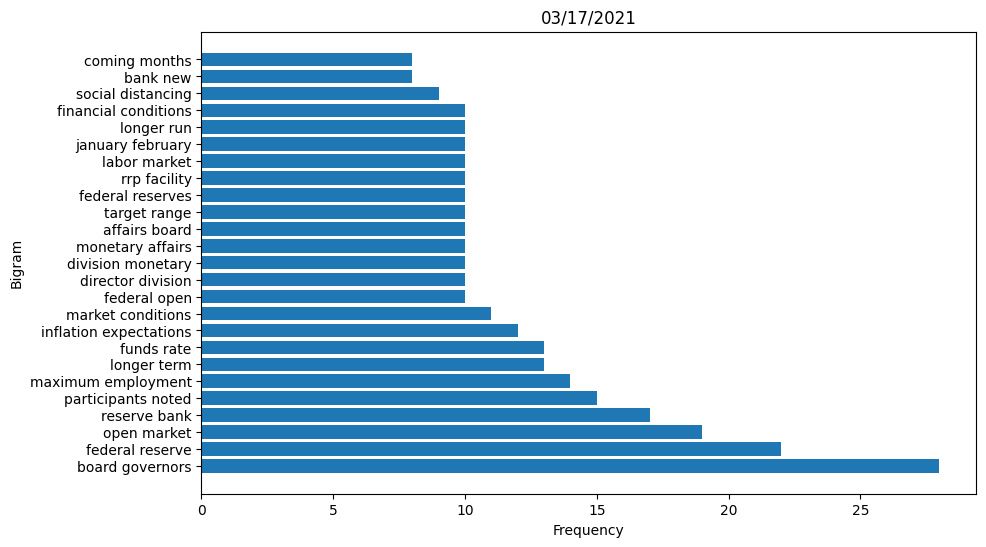

<FreqDist with 4263 samples and 5535 outcomes>


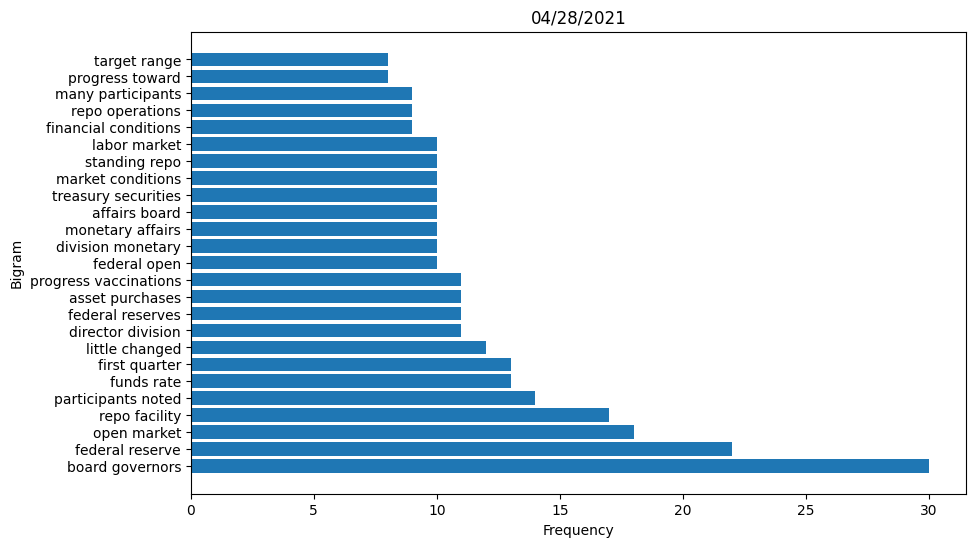

<FreqDist with 4513 samples and 6040 outcomes>


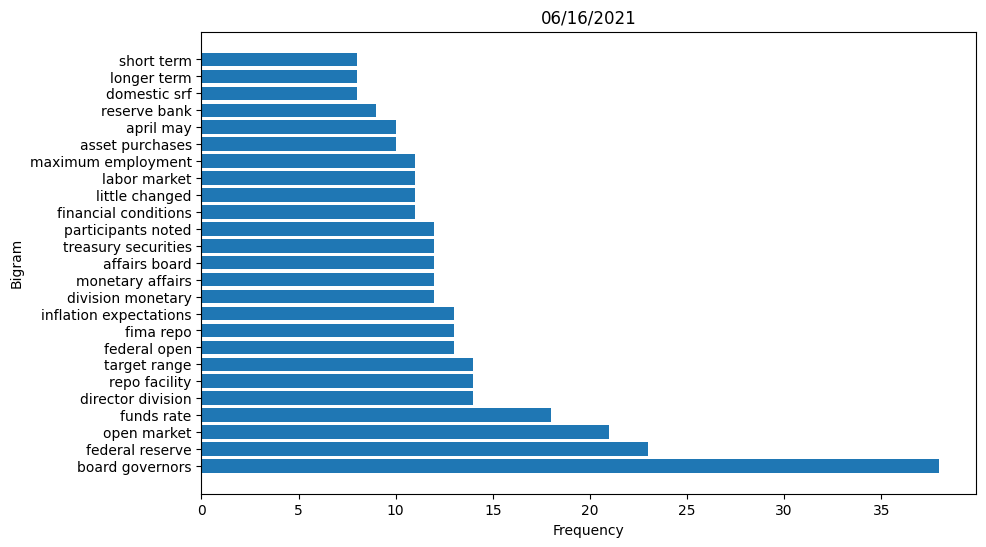

<FreqDist with 4808 samples and 6563 outcomes>


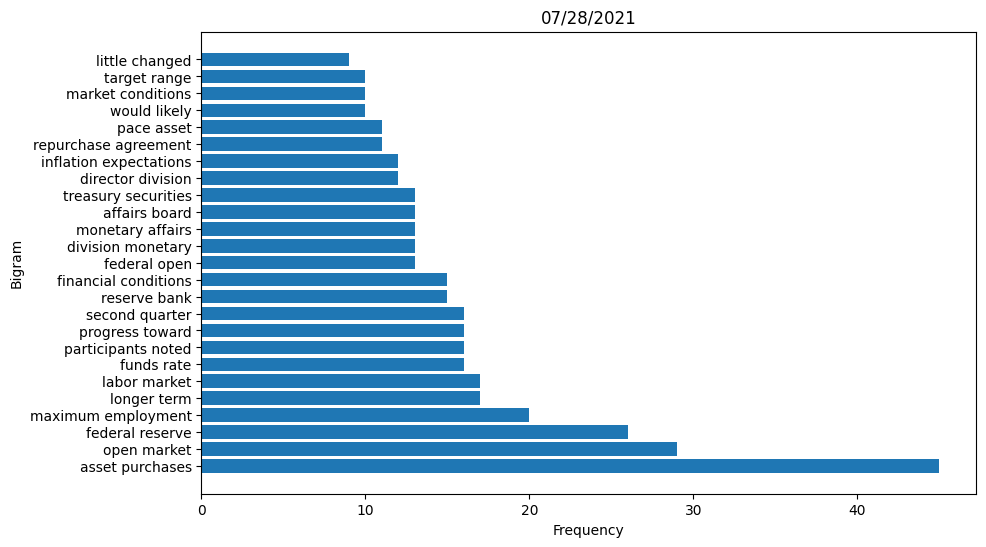

<FreqDist with 4191 samples and 5426 outcomes>


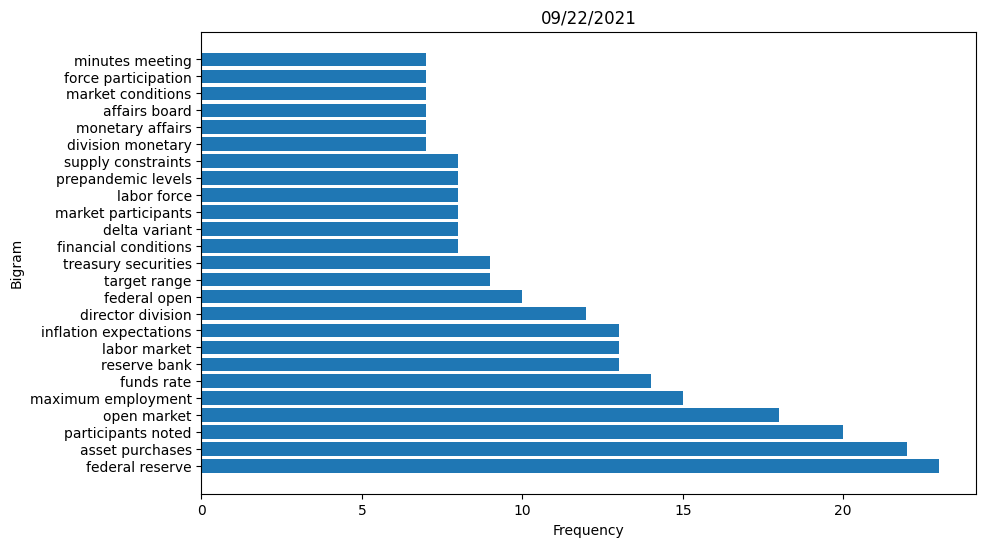

<FreqDist with 3932 samples and 5165 outcomes>


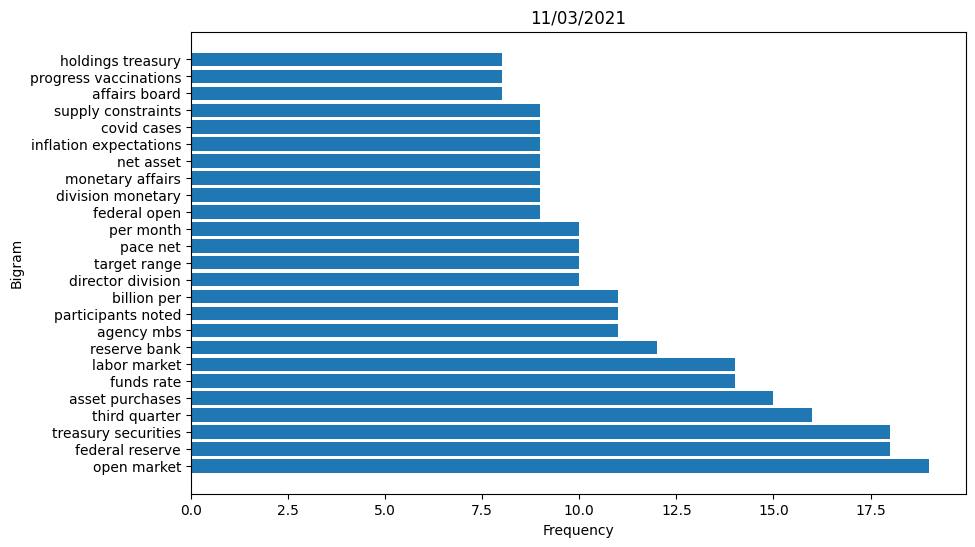

<FreqDist with 4428 samples and 5790 outcomes>


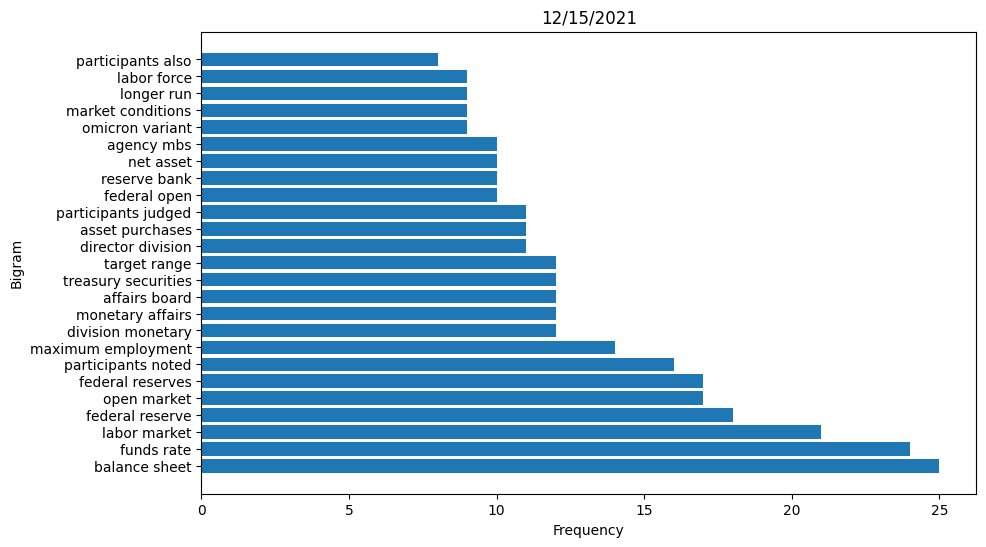

<FreqDist with 5912 samples and 8141 outcomes>


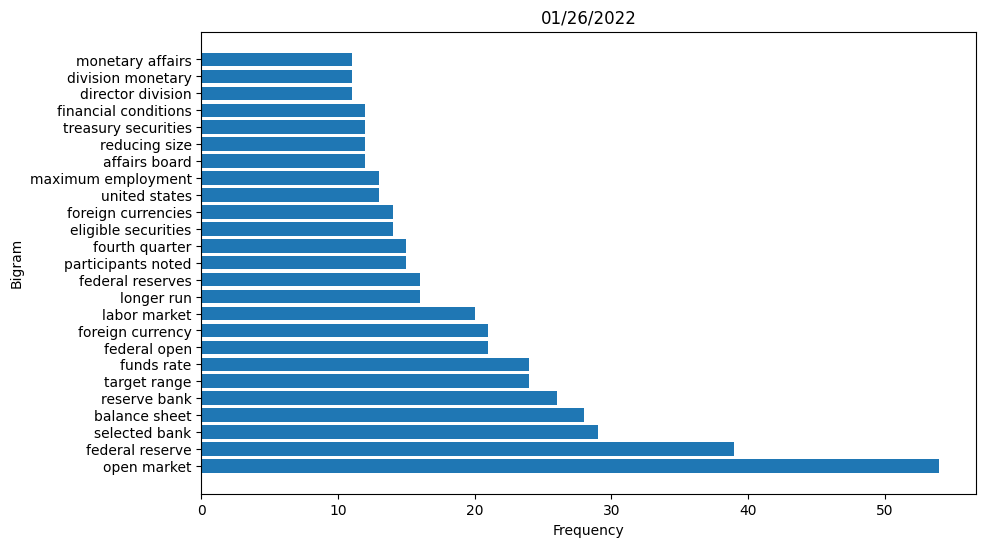

<FreqDist with 4153 samples and 5467 outcomes>


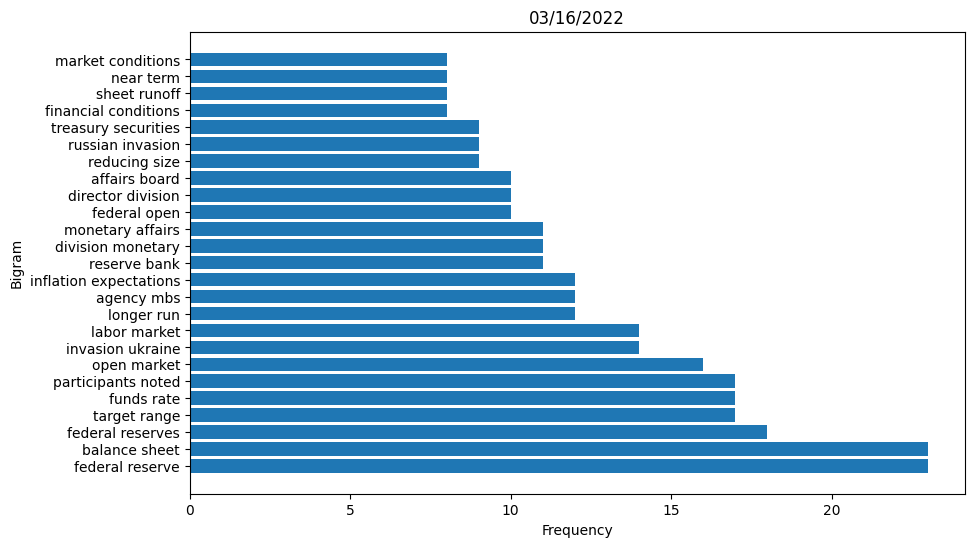

<FreqDist with 3757 samples and 4978 outcomes>


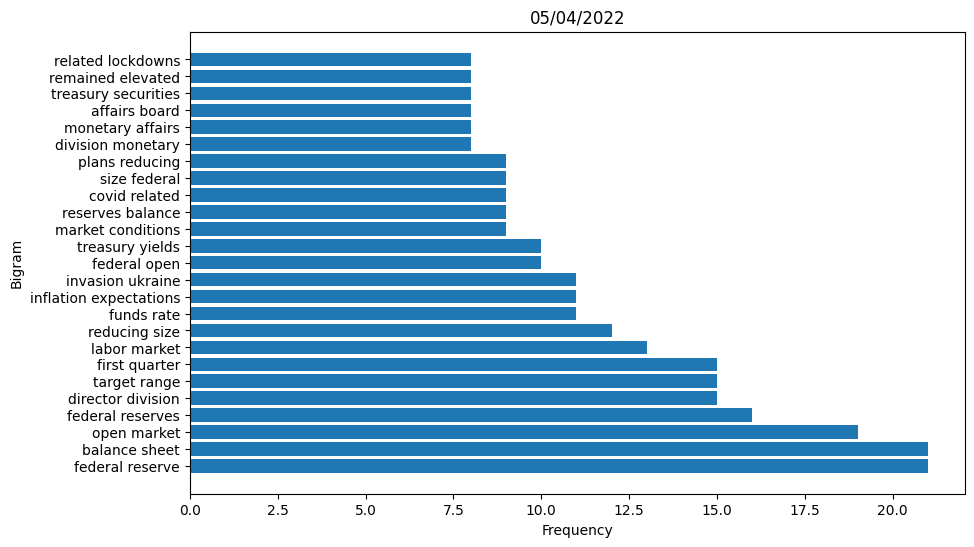

<FreqDist with 3886 samples and 4969 outcomes>


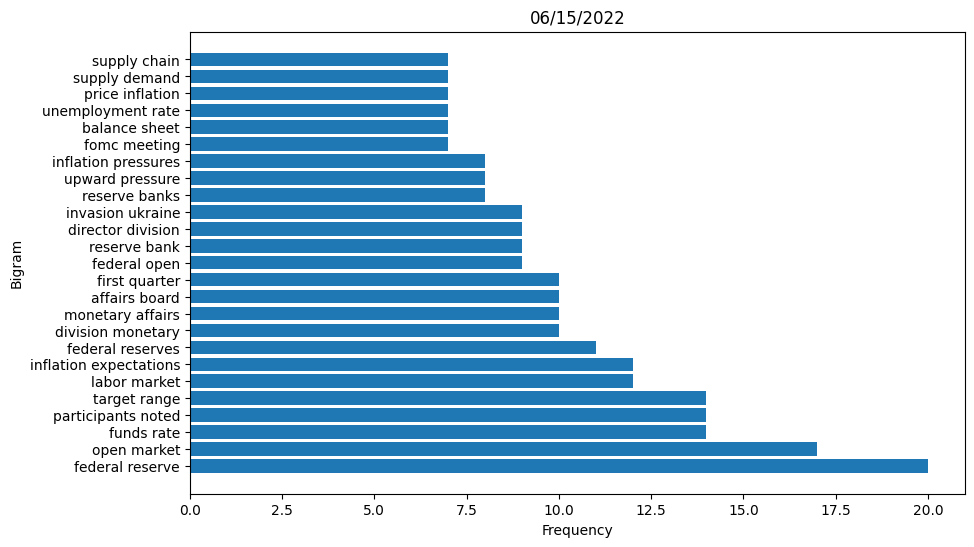

<FreqDist with 4105 samples and 5352 outcomes>


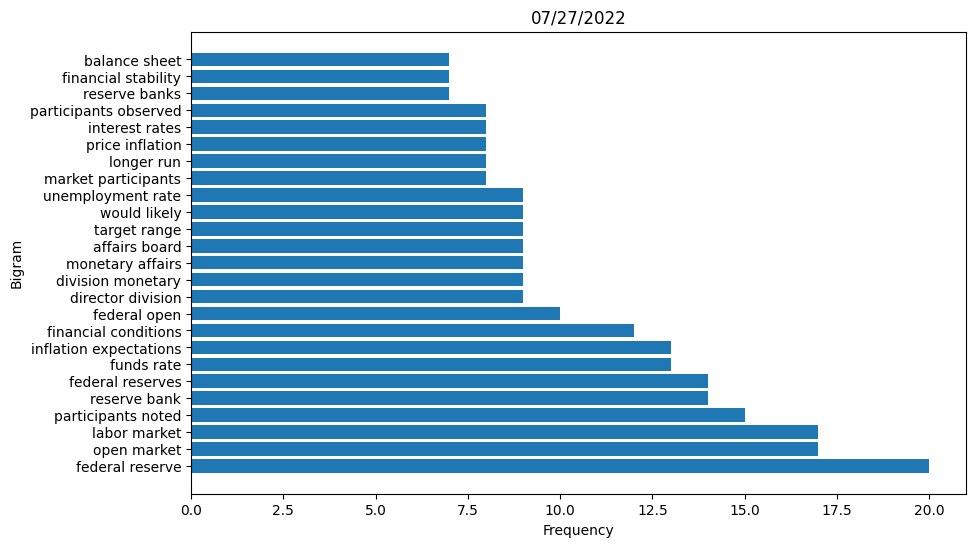

<FreqDist with 3746 samples and 4943 outcomes>


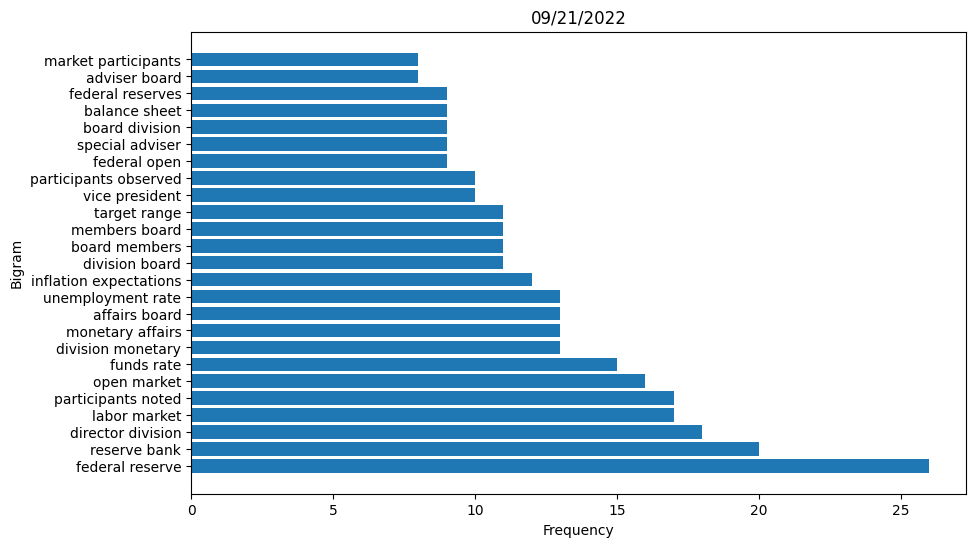

<FreqDist with 3764 samples and 5117 outcomes>


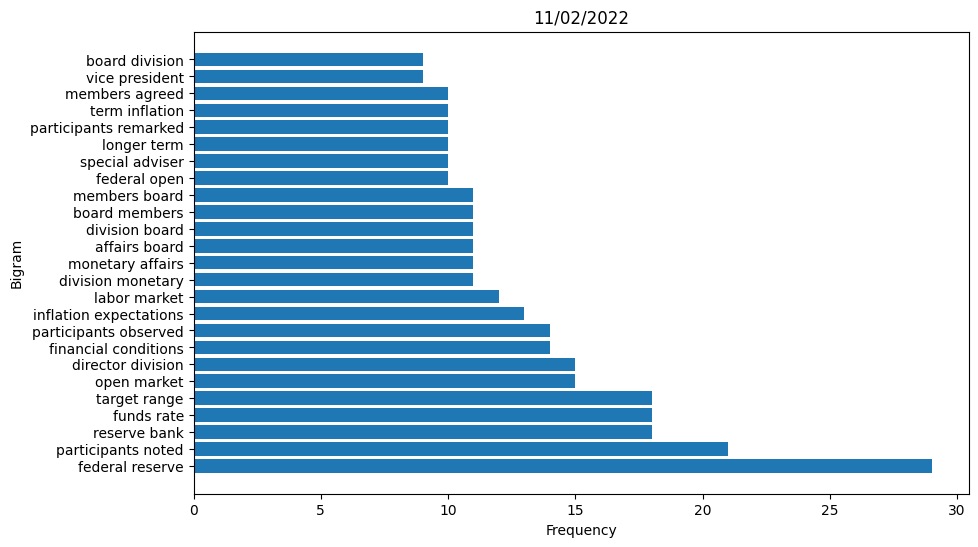

<FreqDist with 3658 samples and 4921 outcomes>


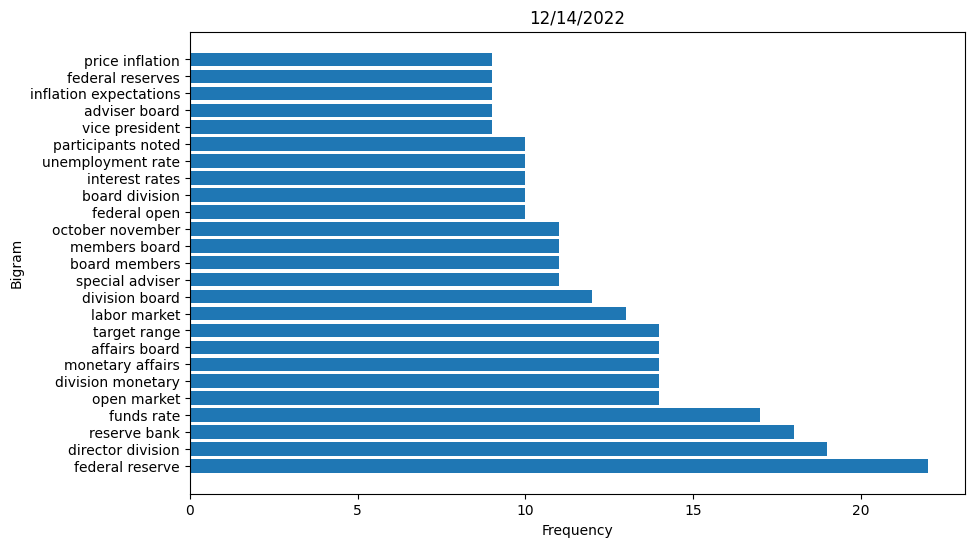

<FreqDist with 4057 samples and 5576 outcomes>


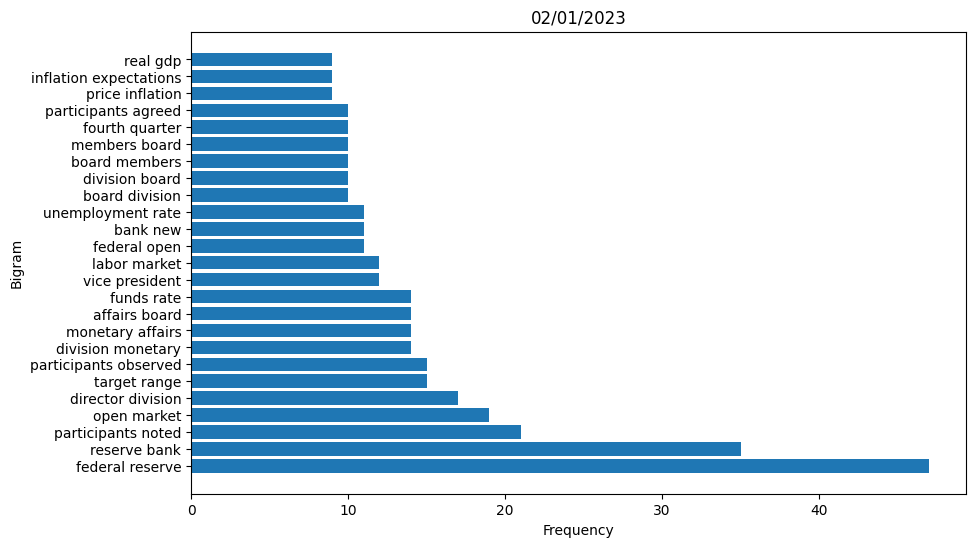

<FreqDist with 3398 samples and 4728 outcomes>


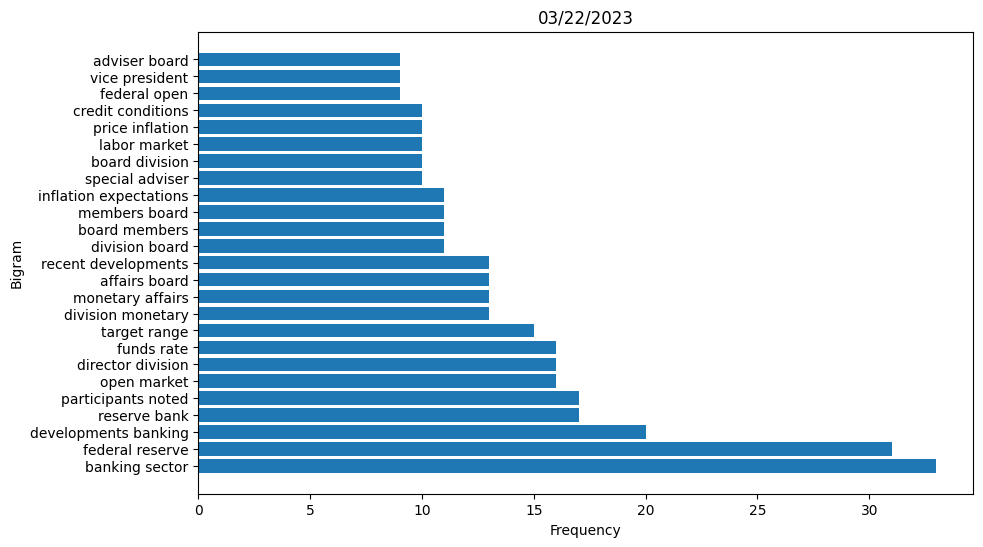

<FreqDist with 3958 samples and 5279 outcomes>


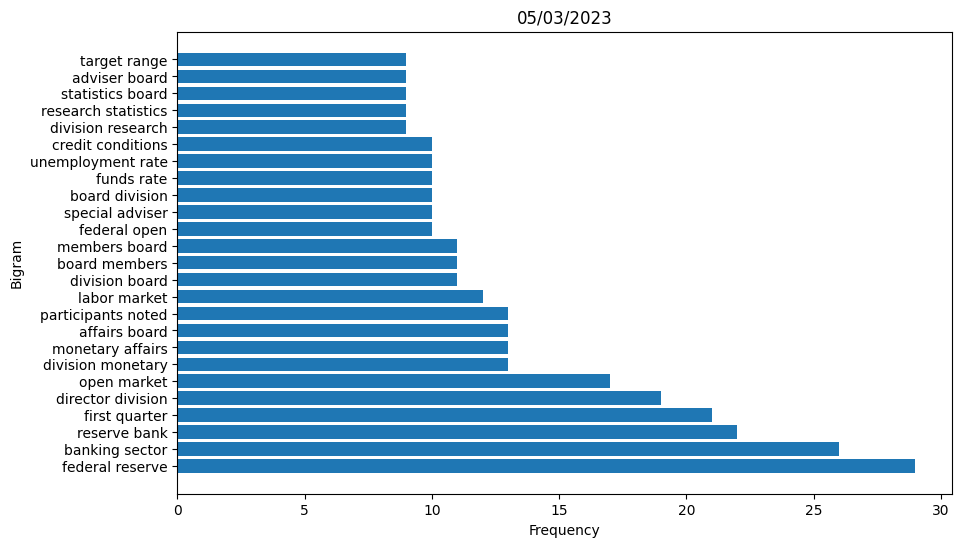

In [49]:
plot_most_frequent_bigrams(texts, num=25, exclude=exclude)

In [25]:
all_clean=list(df['clean_text'])

In [26]:
#create a function which can plot the frequency of any word on a time scale

#here all texts are contained in all_clean
#all the x_labels are contained in datess
import numpy as np

def plot_word_frequency(word, texts, labels,width,height):
    frequencies = []
    
    for text in texts:
        # Count the occurrences of the word in each text
        count = text.lower().split().count(word.lower())
        frequencies.append(count)

    # Create an array of indices for the x-axis
    x = np.arange(len(labels))    

    # Set the figure size
    plt.figure(figsize=(width, height))    
    
    # Plot the frequencies
    plt.bar(labels, frequencies)
    plt.xlabel('Text')
    plt.ylabel('Frequency')
    plt.title(f'Frequency of "{word}" over {len(texts)} feds')
    plt.xticks(rotation=90)
    plt.show()


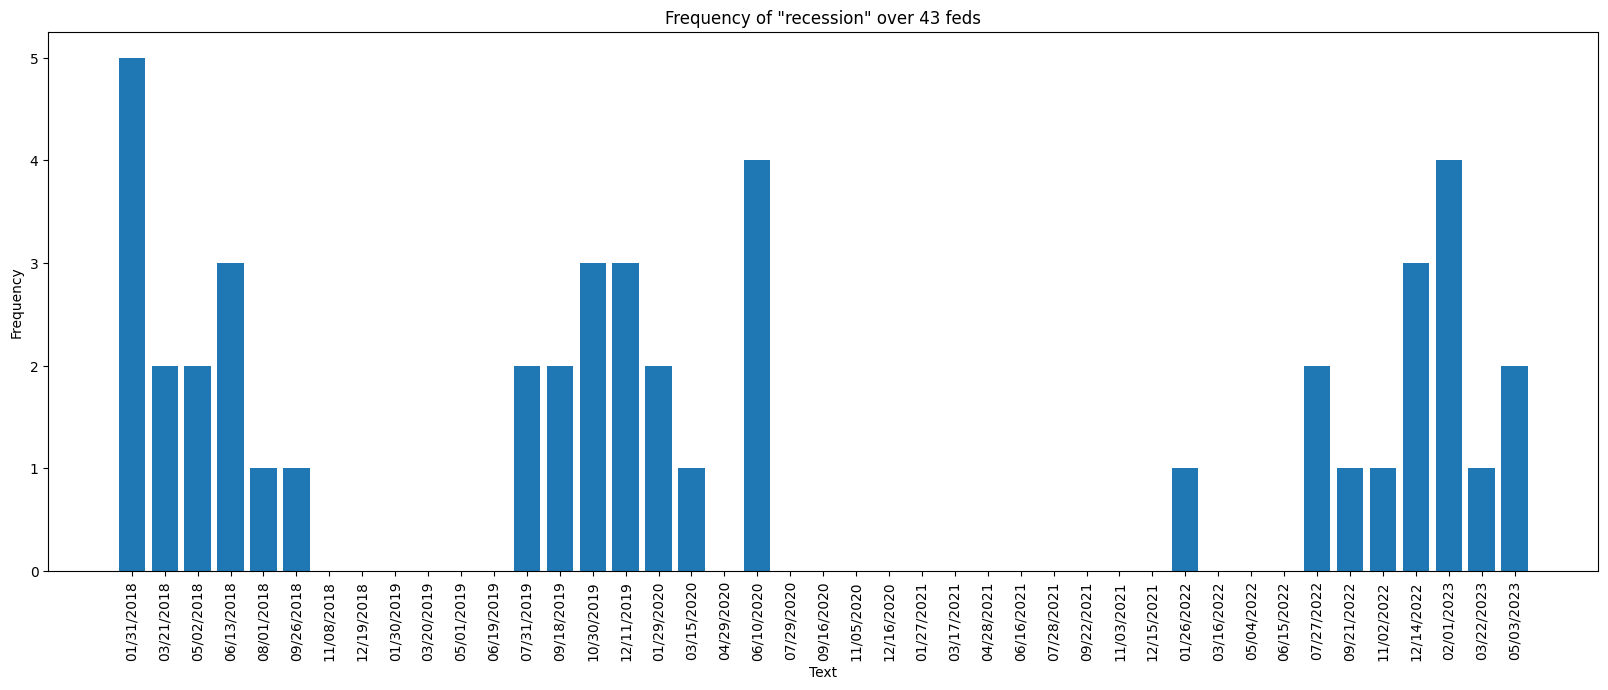

In [27]:
word="recession"
plot_word_frequency(word, all_clean,datess, 20, 7)

In [28]:
#plot a function to plot the frequency of a bigram on a time scale

def plot_bigram_frequency(texts, bigram, x_labels):
    frequencies = []

    for text in texts:
        # Tokenize the text into words
        tokens = text.split()

        # Generate bigrams
        bigrams = list(ngrams(tokens, 2))

        # Calculate the frequency distribution of bigrams
        freq_dist = FreqDist(bigrams)

        # Get the frequency of the specific bigram
        frequency = freq_dist[bigram]
        frequencies.append(frequency)

    # Plot the bigram frequency
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(texts)), frequencies, align='center')
    plt.xticks(range(len(texts)), x_labels, rotation=90, ha='right')  # Set x-tick labels
    plt.xlabel('Text')
    plt.ylabel('Frequency')
    plt.title(f'Frequency of Bigram "{bigram}" Across Texts')
    plt.tight_layout()
    plt.show()


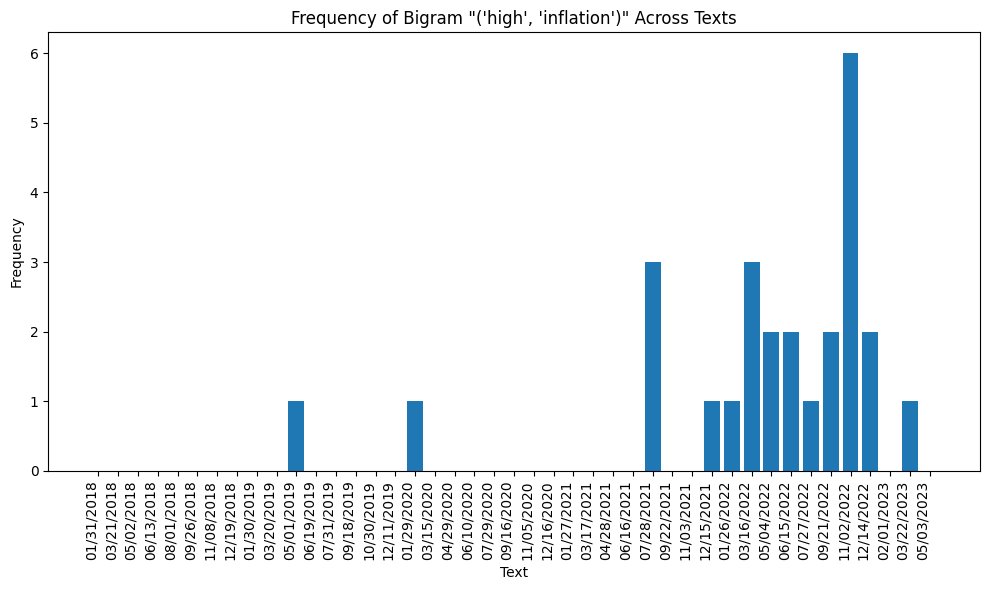

In [29]:
bigram = ('high', 'inflation')
x_labels = list(df['DATE'])
plot_bigram_frequency(texts, bigram, x_labels)

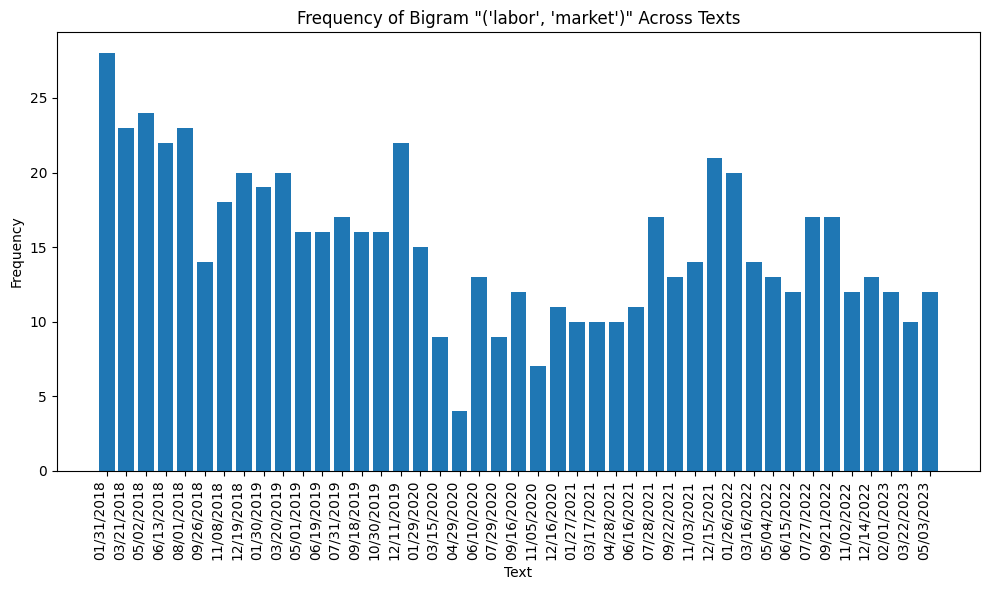

In [30]:
bigram = ('labor', 'market')
x_labels = list(df['DATE'])
plot_bigram_frequency(texts, bigram, x_labels)

In [31]:
#important words
#anagrams

#bigrams

In [32]:
# #create a function which gets all the words , in sets of 2 which occur as all_caps
# import re

# def extract_all_caps_words(text):
#     #pattern = r'\b[A-Z]+\b'
#     pattern = r'\b[A-Z]{2,}\b'
#     all_caps_words = re.findall(pattern, text)
#     return all_caps_words

# text=df["TEXT"][0]
# all_caps_words = extract_all_caps_words(text)
# print(set(all_caps_words))
